**Autor:** [Mario Bustillo](https://www.linkedin.com/in/mario-bustillo/)

**Fecha:** Noviembre 22, 2024

# 0) Acerca el dataset 📃

### Contexto

**iFood** es la aplicación líder de entrega de comida en Brasil, presente en más de mil ciudades.

El conjunto de datos contiene características sociodemográficas y firmográficas de 2.240 clientes que
fueron contactados.

### Análisis:

El objetivo del equipo es desarrollar un modelo que prediga el comportamiento de los clientes y aplicarlo al resto de la base de clientes. Además, más allá de maximizar el beneficio de la campaña, el CMO está interesado en estudiar las características de los clientes dispuestos a comprar el gadget.

Se espera mejorar el ROI de la próxima campaña mediante un modelo predictivo que permita identificar clientes propensos a aceptar una oferta.

### Contenido:

* Visión general de las campañas
* Perfil del cliente (Clientes que aceptaron al menos una oferta vs Clientes que no aceptaron ninguna oferta)
* Segmentación de clientes basada en el comportamiento histórico
* Modelo predictivo para mejorar el beneficio de la campaña
* Conclusiones


Campos y variables

* AcceptedCmp1: 1 si el cliente aceptó la oferta en la 1ª campaña. 0 en caso contrario
* AcceptedCmp2: 1 si el cliente aceptó la oferta en la 2ª campaña. 0 en caso contrario
* AcceptedCmp3: 1 si el cliente aceptó la oferta en la 3ª campaña. 0 en caso contrario
* AcceptedCmp4: 1 si el cliente aceptó la oferta en la 4ª campaña, 0 en caso contrario
* AcceptedCmp5: 1 si el cliente aceptó la oferta en la 5ª campaña, 0 en caso contrario
* Response (target): 1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario
* Complain: 1 si el cliente se quejó en los últimos 2 años
* DtCustomer: fecha de alta del cliente en la empresa
* Education: nivel de educación del cliente
* Marital: estado civil del cliente
* Kidhome:número de niños pequeños en el hogar del cliente
* Teenhome: número de adolescentes en el hogar del cliente
* Income: ingresos familiares anuales del cliente
* Mnt Fish Products: cantidad gastada en productos de pescado en los últimos 2 años
* Mnt Meat Products: cantidad gastada en productos de carne en los últimos 2 años
* Mnt Fruits: cantidad gastada en frutas en los últimos 2 años
* MntSweet Products: cantidad gastada en productos dulces en los últimos 2 años
* Mnt Wines: cantidad gastada en vinos en los últimos 2 años
* MntGoldProds: cantidad gastada en productos gold en los últimos 2 años
* NumDealsPurchases: número de compras realizadas con descuento
* NumCatalog Purchases: número de compras realizadas mediante catálogo
* NumStorePurchases: número de compras realizadas directamente en tiendas

* NumWebPurchases: número de compras realizadas a través del sitio web de la empresa
* NumWebVisitsMonth: número de visitas al sitio web de la empresa en el último mes
* Recency: número de días desde la última compra


[Fuente: ifood](https://github.com/ifood/ifood-data-analyst-case).




```
# Esto tiene formato de código
```



# 1) Cargar los datos 📕

In [6]:
#!pip install -U ydata-profiling

In [7]:
#!pip install funpymodeling

In [8]:
import pandas as pd
from ydata_profiling import ProfileReport
from funpymodeling.exploratory import status
import seaborn as sns
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

In [408]:
path_ddbb = "/content/drive/MyDrive/Bases de Datos/iFood/data_campaign.csv"

In [10]:
path_images = "/content/drive/MyDrive/Bases de Datos/iFood/images/"

In [11]:
path_files = "/content/drive/MyDrive/Bases de Datos/iFood/files/"

In [12]:
# Para este caso nos interesa visualizar todas las columnas
pd.set_option('display.max_columns', None)

In [13]:
data = pd.read_csv(path_ddbb, sep=";")

In [14]:
data.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0


Tamaño del dataset

In [15]:
data.shape

(2240, 29)

Tenemos un dataset con **2240 filas** y **29 columnas**

# 2) Preparación de la data 👀

## 2.1) Exploración del dataset 🔍

In [16]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,ID,0,0.000000,1,0.000446,2240,int64
1,Year_Birth,0,0.000000,0,0.000000,59,int64
2,Education,0,0.000000,0,0.000000,5,object
3,Marital_Status,0,0.000000,0,0.000000,8,object
4,Income,24,0.010714,0,0.000000,1974,float64
5,Kidhome,0,0.000000,1293,0.577232,3,int64
6,Teenhome,0,0.000000,1158,0.516964,3,int64
7,Dt_Customer,0,0.000000,0,0.000000,663,object
8,Recency,0,0.000000,28,0.012500,100,int64
9,MntWines,0,0.000000,13,0.005804,776,int64


**Observaciones:**
* No hay ningún ID duplicado, podemos continuar con el análisis exploratorio.
* Como podemos ver nos faltan 24 datos de los ingresos anuales (`Income`)
* Las columnas `Z_CostContact` y `Z_revenue` tienen el mismo valor para todas las filas (Z_CostContact = 3 y Z_revenue = 11), por lo que las podemos eliminar

In [17]:
#Eliminar las columnas Z_CostContact y Z_Revenue
data=data.drop(['Z_CostContact', 'Z_Revenue'], axis = 1)

## 2.2) Overview 👀

In [18]:
#Veamos algunos detalles estadísticos del dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


* Participación en Campañas

In [19]:
# Separar a los clientes que aceptaron la oferta al menos una vez
Campaigns = data[(data.AcceptedCmp1 + data.AcceptedCmp2 + data.AcceptedCmp3 + data.AcceptedCmp4 + data.AcceptedCmp5) >=1]

In [20]:
# Ofertas aceptadas por campaña
camp2=pd.DataFrame()
camp2['camp1'] = [Campaigns.AcceptedCmp1.sum()]
camp2['camp2'] = [Campaigns.AcceptedCmp2.sum()]
camp2['camp3'] = [Campaigns.AcceptedCmp3.sum()]
camp2['camp4'] = [Campaigns.AcceptedCmp4.sum()]
camp2['camp5'] = [Campaigns.AcceptedCmp5.sum()]
camp2

,camp1,camp2,camp3,camp4,camp5
0,144,30,163,167,163


* Educación

In [21]:
# Frecuencia con la que aparecen cada variable categorica del nivel de educación
data.groupby("Education")["ID"].nunique().sort_values(ascending = False)

,ID
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


* Estado Civil

In [22]:
# Frecuencia con la que aparecen cada variable categorica del estado civil
data.groupby("Marital_Status")["ID"].nunique().sort_values(ascending = False)

,ID
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


Como podemos ver en los valores de `Marital_Status`, hay 3 valores cuyo signicado no es claro: **"Alone", "Absurd" y "YOLO"**. Son una minoria, por lo que los agruparemos y lo denominaremos como **"Other"**

In [23]:
# Agrupar 'Alone','Absurd','YOLO' como "Other"
data['Marital_Status']=data['Marital_Status'].replace(['Alone','Absurd','YOLO'],'Other')
data.groupby("Marital_Status")["ID"].nunique().sort_values(ascending = False)

,ID
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Other,7


## 2.3) Columnas calculadas y Transformaciones 🧮

### Columnas Calculadas

In [24]:
# Edad
from datetime import date
data['Age'] = date.today().year - data['Year_Birth']

In [25]:
# Cantidad de días como cliente afiliado
data['Customer_Days'] = (pd.to_datetime("now") - pd.to_datetime(data['Dt_Customer'])) // np.timedelta64(1,'D')


In [26]:
# Articulos comprados
data['MntTotal'] = data.loc[:,['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [27]:
# Productos Regulares comprados
data['MntRegularProds'] = data.loc[:,'MntTotal'] - data.loc[:,'MntGoldProds']

In [28]:
# Cantidad de campañas aceptadas
data['AcceptedCmpOverall'] = data.loc[:,['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

### Transformaciones

A las variables categoricas de `Marital Status` y `Education` les asignaremos un ID equivalente

In [29]:
data['Marital_ID']=data['Marital_Status'].replace(['Single','Together','Married', 'Divorced','Widow','Other'],[0,1,2,3,4,5])
data['Education_ID']=data['Education'].replace(['Basic','2n Cycle','Graduation', 'Master','PhD'],[0,1,2,3,4])

<ipython-input-29-1b56276cde28>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Marital_ID']=data['Marital_Status'].replace(['Single','Together','Married', 'Divorced','Widow','Other'],[0,1,2,3,4,5])
<ipython-input-29-1b56276cde28>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Education_ID']=data['Education'].replace(['Basic','2n Cycle','Graduation', 'Master','PhD'],[0,1,2,3,4])


In [30]:
#Marital Status ID equivalente
Marital=data.groupby('Marital_ID')['Marital_Status'].unique()
pd.DataFrame({'Marital_ID':Marital.index, 'Marital_Status':Marital.values})

,Marital_ID,Marital_Status
0,0,[Single]
1,1,[Together]
2,2,[Married]
3,3,[Divorced]
4,4,[Widow]
5,5,[Other]


In [31]:
#Education ID equivalente
Education=data.groupby('Education_ID')['Education'].unique()
pd.DataFrame({'Education_ID':Education.index, 'Education':Education.values})

,Education_ID,Education
0,0,[Basic]
1,1,[2n Cycle]
2,2,[Graduation]
3,3,[Master]
4,4,[PhD]


In [32]:
#Veamos algunos detalles estadísticos del dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


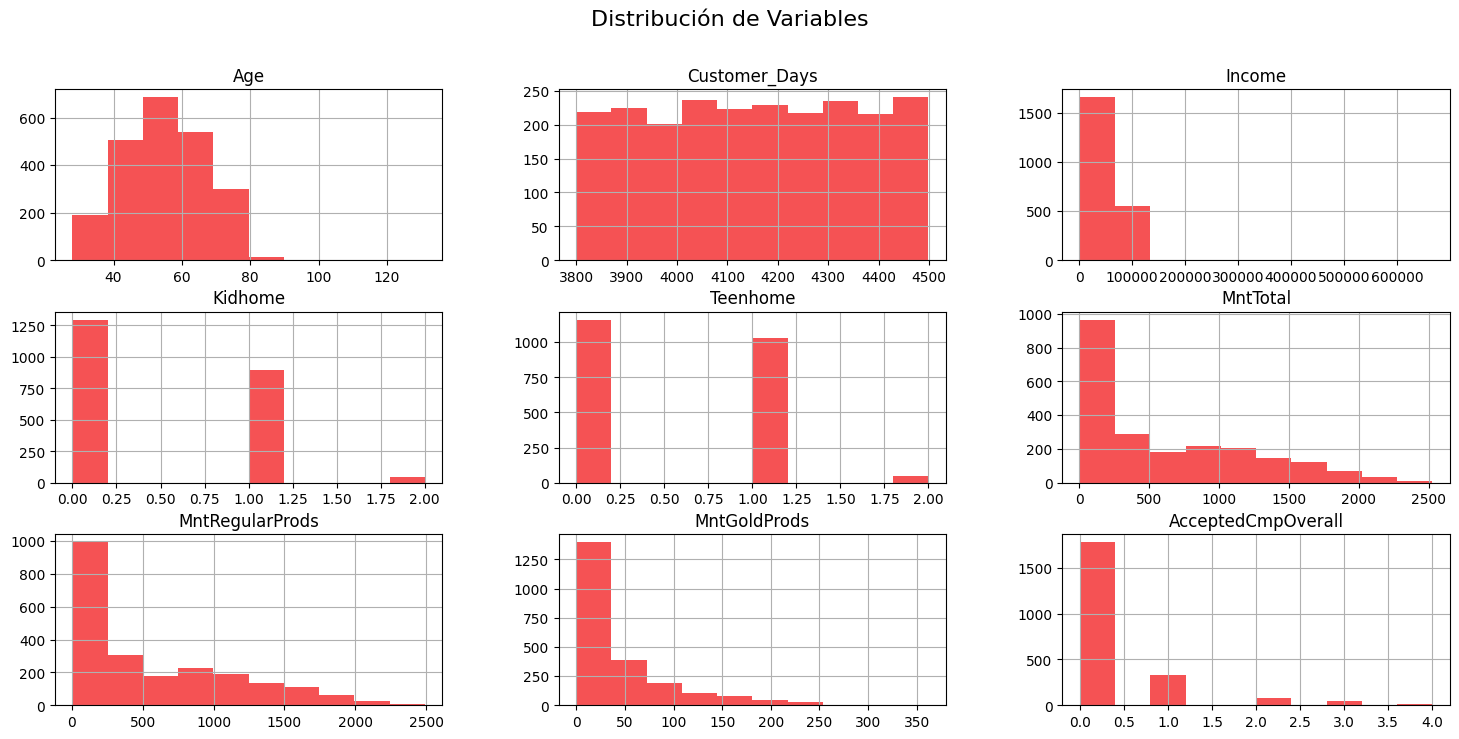

In [33]:
data.hist(column = ['Age', 'Customer_Days', 'Income', 'Kidhome', 'Teenhome', 'MntTotal', 'MntRegularProds', 'MntGoldProds', 'AcceptedCmpOverall'],
          figsize=(18,8), color="#F55254")

plt.suptitle('Distribución de Variables', fontsize=16)

# Guardar el gráfico en un archivo
#plt.savefig(path_images+'fig_1.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

**Figura 1:** Distribución de variables

## 2.4) Análisis de desempeño de las Campañas 📣

Teniendo en cuenta que se contactó a los 2240 clientes, independientemente de que tengamos valores faltantes (como en los ingresos), omitiremos ese aspecto y veremos como les fue a las últimas campañanas a nivel de participación en la mismas.

In [34]:
# Cantidad de Clientes unicos que aceptaron una oferta
count_users_accepted = data[data['AcceptedCmpOverall'] > 0].shape[0]
total_success_rate = (data[data['AcceptedCmpOverall'] > 0].shape[0]) /data.shape[0]*100

print(f"Clientes que compraron al menos una vez: {count_users_accepted}")
print(f"Success Rate General: {total_success_rate}")

Clientes que compraron al menos una vez: 463
Success Rate General: 20.669642857142854


In [35]:
# Crear el DataFrame 'camp2' con la suma de aceptación de las campañas
camp2 = pd.DataFrame()

# Sumar las aceptaciones de cada campaña
camp2['camp1'] = [Campaigns.AcceptedCmp1.sum()]
camp2['camp2'] = [Campaigns.AcceptedCmp2.sum()]
camp2['camp3'] = [Campaigns.AcceptedCmp3.sum()]
camp2['camp4'] = [Campaigns.AcceptedCmp4.sum()]
camp2['camp5'] = [Campaigns.AcceptedCmp5.sum()]

# El total de Clientes analizados
total_customers = data.shape[0]

# Calcular el success rate (porcentaje de aceptación) para cada campaña respecto al total de clientes analizados
success_rate = ((camp2.iloc[0] / total_customers) * 100).round(2)

# Añadir la fila con los success rates al DataFrame
camp2.loc['% Success Rate'] = success_rate

# Mostrar el DataFrame final
print(camp2)


                 camp1  camp2   camp3   camp4   camp5
0               144.00  30.00  163.00  167.00  163.00
% Success Rate    6.43   1.34    7.28    7.46    7.28


Después de 5 campañas, solo 463 (20,7%) de los 2.240 clientes contactados compraron el producto al menos una vez y se aceptaron 463 ofertas.

Como podemos ver:
* La Campaña 4 (aceptación de 167 clientes un 7.46% de success rate) tuvo un mejor rendimiento
* La Campaña 2, un peor rendimiento con tan solo un 1,34% de sucess rate.
* En la Campaña 4, solo el 7.46% de los clientes compraron efectivamente un gadget, lo que demuestra que es posible seleccionar mejor a los clientes con más probabilidades de comprar, con el fin de reducir los costos de la campaña y mejorar el beneficio.


## 2.5) Limpieza del dataset 🧰

**Age**
* Vemos que la distribución de la edad tiene valores extremos muy altos. Veamos la distribución respecto al resto

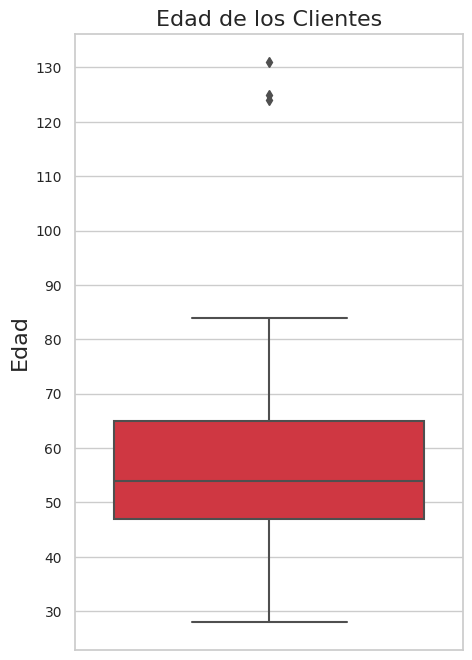

In [36]:
sns.set(style = 'whitegrid',rc={'figure.figsize':(5,8)})
ax = sns.boxplot(y=data.Age, color='#E81E2C')
ax.axes.set_title("Edad de los Clientes",fontsize=16)
ax.set_ylabel("Edad",fontsize=16)
ax.tick_params(labelsize=10)
ax.yaxis.set_major_locator(plt.MultipleLocator(10))

# Guardar el gráfico en un archivo
#plt.savefig(path_images+'fig_2.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

**Figura 2:** Diagrama de caja y cola con la distribución aproximada por edad de los clientes.

In [37]:
#Age quantiles
data.Age.quantile([0.25,0.5,0.75])

,Age
0.25,47.0
0.50,54.0
0.75,65.0


Podemos observar un valor mínimo a los 28 años y un valor máximo a los 84 años, excluyendo los que se acercan a los 130 años. La edad media es de 54 años. El 25% de los clientes tiene menos de 47 años, el 75% tiene menos de 65 años y el 25% tiene entre 65 y 84 años.

In [38]:
# Excluir los outliers de edad del DataFrame:
mask_age = data.Age > 90
data = data[~mask_age]
data.shape

(2237, 34)

Excluyendo los 3 valores atípicos con edad mayor a 90 años, ahora tenemos 2237 filas.

**Income**
* Excluir las filas con valores faltantes

In [39]:
mask_income = data.Income.isnull()
data = data[~mask_income]
data.shape

(2213, 34)

Excluyendo las filas con datos faltantes, ahora tenemos 2213 filas.

* Veamos la distribución respecto al resto de datos de income

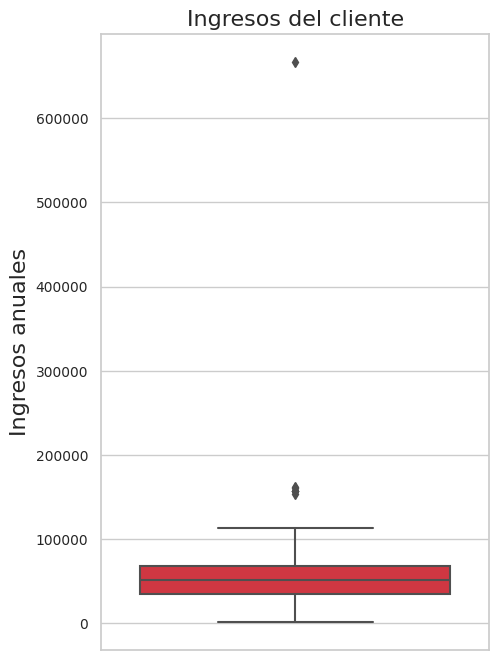

In [40]:
sns.set(style = 'whitegrid',rc={'figure.figsize':(5,8)})
ax = sns.boxplot(y=data.Income, color='#E81E2C')
ax.axes.set_title("Ingresos del cliente",fontsize=16)
ax.set_ylabel("Ingresos anuales",fontsize=16)
ax.tick_params(labelsize=10)

# Guardar el gráfico en un archivo
#plt.savefig(path_images+'fig_3.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

**Figura 3:** Diagrama de caja y cola con la distribución de ingresos familiares anuales.

In [41]:
data.Income.quantile([0.25,0.5,0.75])

,Income
0.25,35246.0
0.50,51373.0
0.75,68487.0


Aquí también podemos ver algunos valores atípicos para el ingreso anual, pero el que está por encima de 600.000 está realmente lejos del resto. Por ello lo excluiremos, ya que es 6 veces mayor que el valor representativo máximo.

In [42]:
# Excluimos el valor extremo sospechoso
mask_inc = data.Income>300000
data = data[~mask_inc]
data.shape

(2212, 34)

* Evaluamos de nuevo la distribución de los valores de `Income`

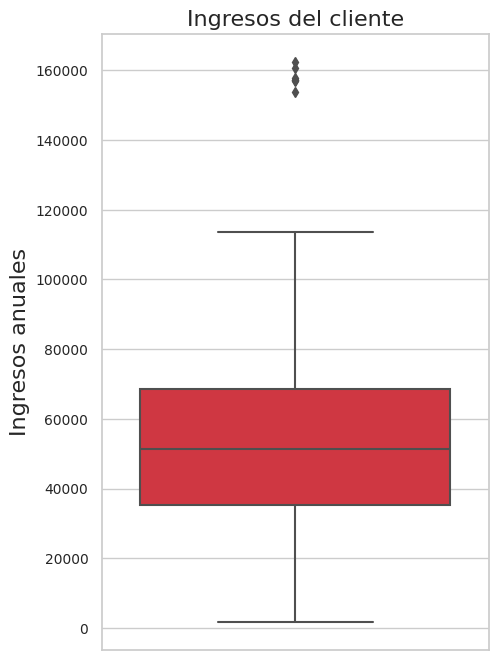

In [43]:
sns.set(style = 'whitegrid',rc={'figure.figsize':(5,8)})
ax = sns.boxplot(y=data.Income,  color='#E81E2C')
ax.axes.set_title("Ingresos del cliente",fontsize=16)
ax.set_ylabel("Ingresos anuales",fontsize=16)
ax.tick_params(labelsize=10)

# Guardar el gráfico en un archivo
#plt.savefig(path_images+'fig_4.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

**Figura 4:** Diagrama de caja y cola con la distribución de ingresos familiares anuales después de eliminar el valor atípico más alto

In [44]:
data.Income.quantile([0.25,0.5,0.75])

,Income
0.25,35233.5
0.50,51371.0
0.75,68487.0


* Mantenemos los valores de 160.000UM ya que varios clientes presentan esa cantidad de ingresos
* El 25% de los clientes tienen un ingreso familiar anual de hasta 35.233UM,5; el valor medio es 51.371UM y el 75% de los clientes tienen un ingreso anual inferior a 68.487UM.

## 2.6) Correlación de variables 🔀

In [45]:
# Eliminemos las columnas que no necesitamos
data_correlation = data.drop(['Education','Year_Birth','Marital_Status','Dt_Customer','ID'],axis=1)

In [46]:
data_correlation.shape

(2212, 29)

Tenemos un dataset con 2212 filas y 29 columnas (variables)

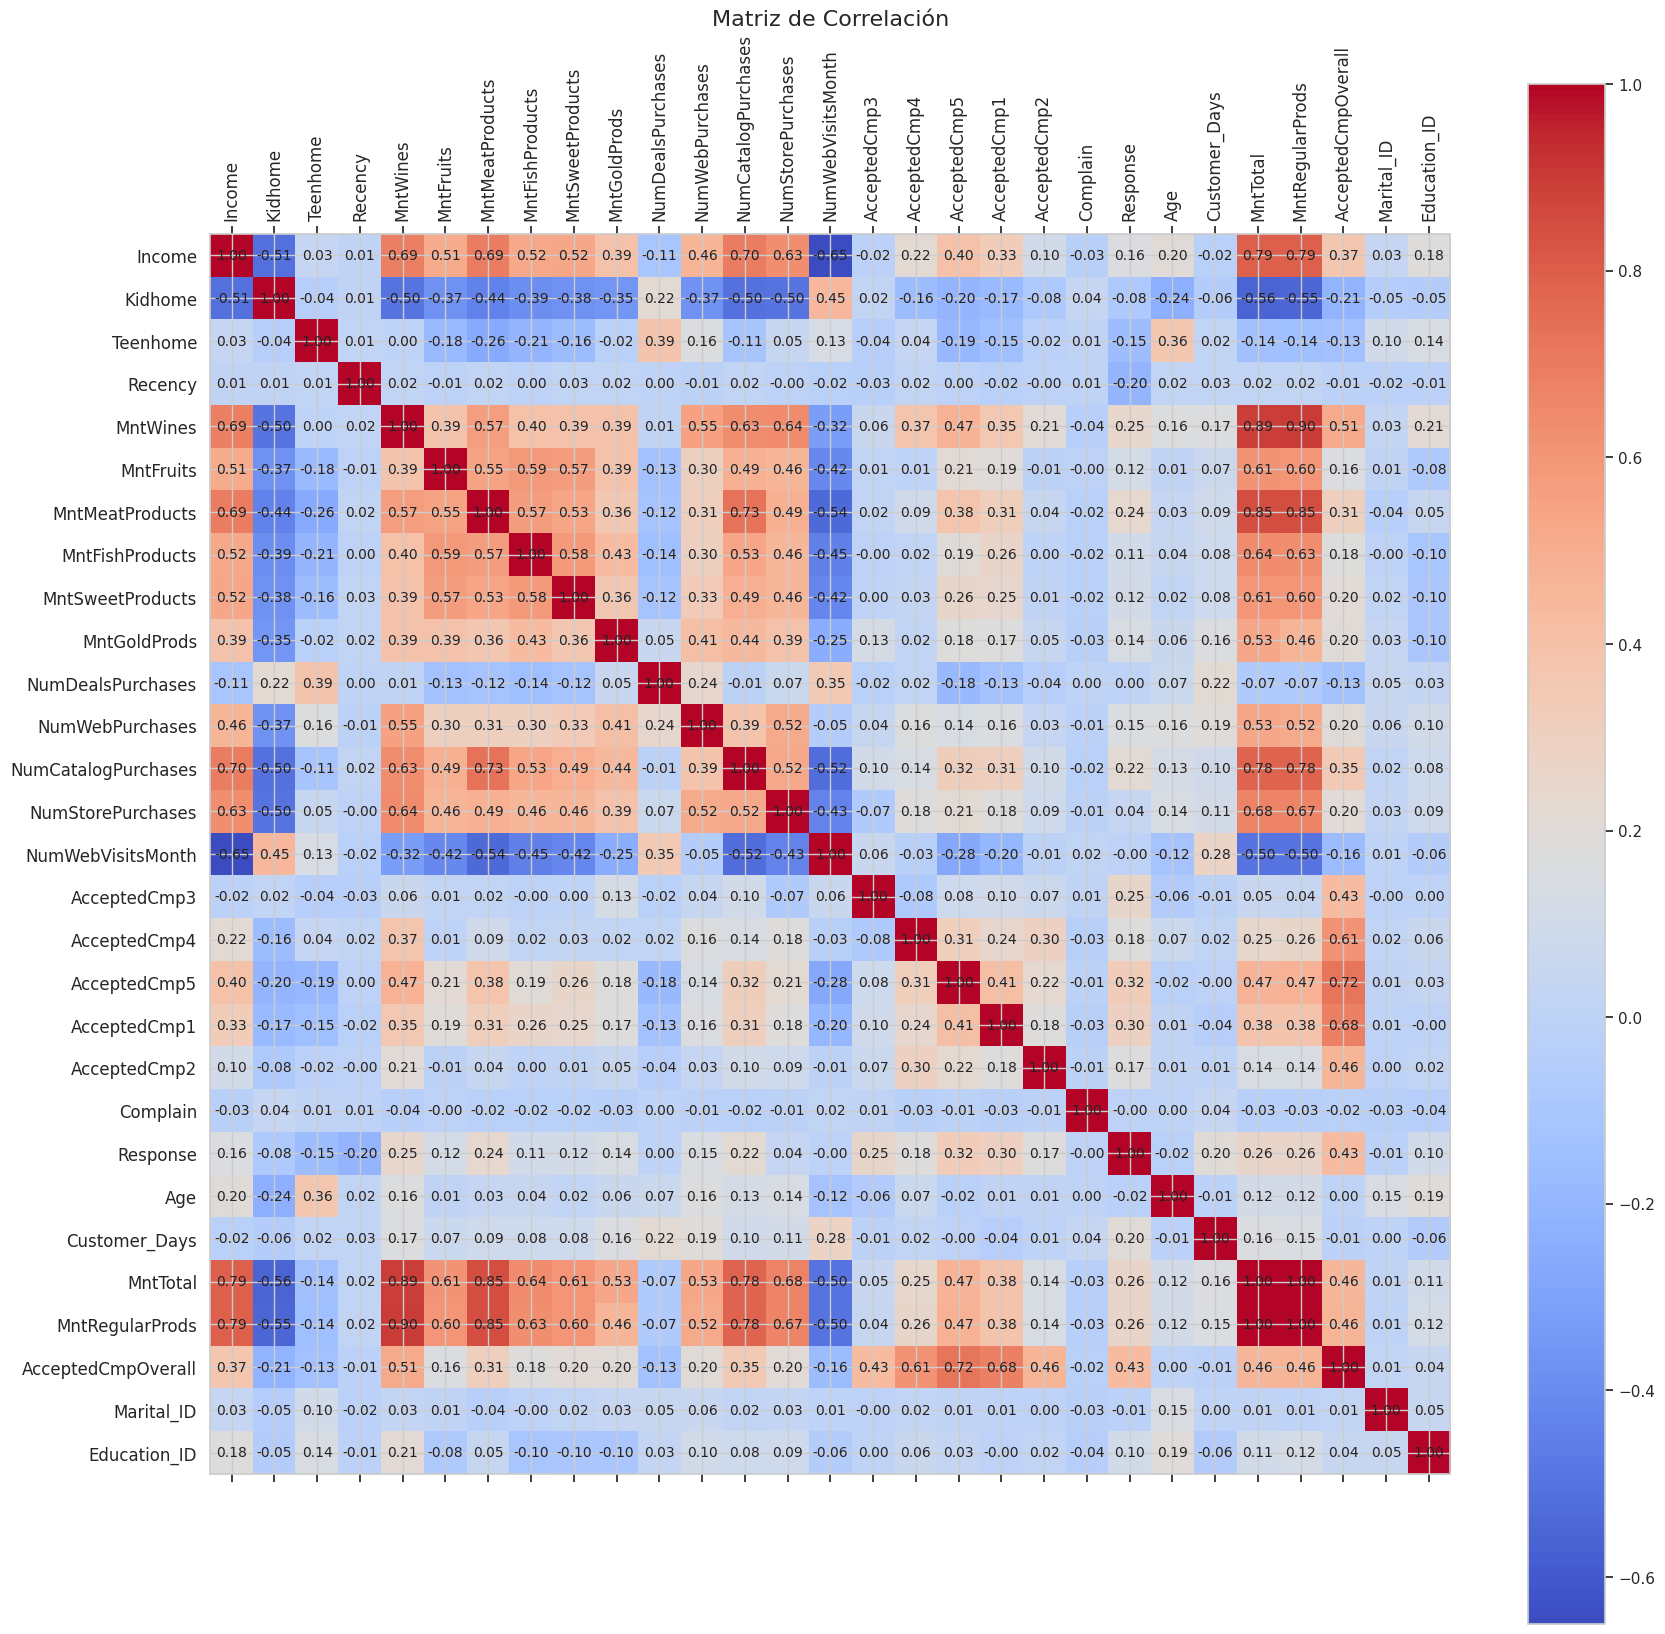

In [47]:
#Matriz de correlación
corrMatrix = data_correlation.corr()

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(20, 20))

# Crear la matriz de correlación como imagen
cax = ax.matshow(corrMatrix, cmap='coolwarm')

# Añadir la barra de color
fig.colorbar(cax)

# Añadir los valores de correlación en cada celda
for (i, j), value in np.ndenumerate(corrMatrix):
    ax.text(j, i, f'{value:.2f}', ha='center', va='center', fontsize=10, color='#262224')

# Ajustar las etiquetas de los ejes
ax.set_xticks(np.arange(len(corrMatrix.columns)))
ax.set_yticks(np.arange(len(corrMatrix.columns)))

# Colocar las etiquetas del eje X en la parte inferior, con rotación y alineación
ax.set_xticklabels(corrMatrix.columns, rotation='vertical', ha='center', fontsize=12)
ax.set_yticklabels(corrMatrix.columns, rotation='horizontal', ha='right', fontsize=12)

# Título y etiquetas de los ejes
plt.title("Matriz de Correlación", fontsize=16)


# Guardar el gráfico en un archivo
#plt.savefig(path_images+'fig_5.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()



**Figura #5:** Matriz de Correlación

Como podemos ver la correlación más alta entre dos variables es 0,7, por lo que no se descartarán ninguna de las características.

# 3) Perfil del Cliente 👥

Separamos los clientes por quienes si han aceptado al menos una oferta de la campaña de mkt versus los que no

In [48]:
# Clientes que aceptaron la oferta al menos una vez
mask_camp = (data.AcceptedCmpOverall >= 1)
accepted = data[mask_camp]

# Clientes que nunca han aceptado una oferta
no_accepted = data[~mask_camp]

In [49]:
accepted.shape

(458, 34)

In [50]:
no_accepted.shape

(1754, 34)

De los 2212 clientes analizados, 458 clientes han aceptado al menos una oferta de las campañas de marketing y 1754 clientes no han aceptado ninguna campaña de marketing.

### 3.1) Educación 📚

Comparemos los dos grupos en cuanto al nivel educativo.

In [51]:
group_acc=accepted.groupby(["Education_ID","Education"])["ID"].nunique().reset_index()
group_no=no_accepted.groupby(["Education"])["ID"].nunique().reset_index()
group_acc["perc_acc"] = 100*(group_acc.ID/(group_acc.ID.sum()))
group_no["perc_no"] = 100*(group_no.ID/(group_no.ID.sum()))

Education_group=(pd.merge(group_acc,group_no,on='Education'))
Education_group = Education_group.rename(columns = {'ID_x': 'quant_acc', 'ID_y': 'quant_no'}, inplace = False)
print(Education_group)

   Education_ID   Education  quant_acc   perc_acc  quant_no    perc_no
0             0       Basic          6   1.310044        48   2.736602
1             1    2n Cycle         37   8.078603       161   9.179019
2             2  Graduation        228  49.781659       887  50.570125
3             3      Master         74  16.157205       291  16.590650
4             4         PhD        113  24.672489       367  20.923603


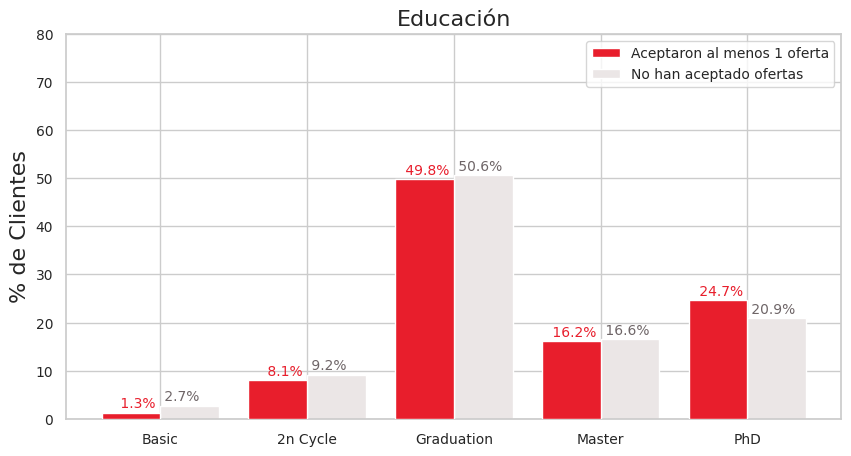

In [52]:
# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 5))

x1 = Education_group.Education
y1 = Education_group.perc_acc

x2 = Education_group.Education
y2 = Education_group.perc_no

# Barras
rects1 = ax.bar(x1, y1, width=-0.4, label='Aceptaron al menos 1 oferta', zorder=3, color='#E81E2C', align='edge')
rects2 = ax.bar(x1, y2, width=0.4, label='No han aceptado ofertas', zorder=2, color='#EBE6E6', align='edge')

# Agregar texto sobre las barras
for i in range(len(y1)):
    # Para perc_acc (primer conjunto de barras)
    ax.text(x1[i], y1[i] + 1, ' '+ str(np.round(y1[i], decimals=1)) + '% ', fontsize=10, ha='right', color='#E81E2C', rotation='horizontal')
    # Para perc_no (segundo conjunto de barras)
    ax.text(x2[i], y2[i] + 1, ' '+ str(np.round(y2[i], decimals=1)) + '%', fontsize=10, ha='left', color='#6E6567', rotation='horizontal')

# Organizar las etiquetas y ejes
ax.set_ylabel('% de Clientes', fontsize=16)
ax.set_title('Educación', fontsize=16)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.legend()

ax.set_ylim(0, 80)
plt.xticks(fontsize=10, rotation='horizontal')
plt.yticks(fontsize=10)

ax.grid(zorder=0)
ax.legend(fontsize=10)

# Guardar el gráfico en un archivo
#plt.savefig(path_images+'fig_6.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

**Figura 6:** Nivel educativo de los clientes que aceptaron al menos una oferta versus clientes que no aceptaron ninguna oferta

### 3.2) Estado Civil

Comparemos los dos grupos en cuanto al estado civil.

In [53]:
group_acc=accepted.groupby(['Marital_ID',"Marital_Status"])["ID"].nunique().reset_index()
group_no=no_accepted.groupby("Marital_Status")["ID"].nunique().reset_index()

group_acc["perc_acc"] = 100*(group_acc.ID/(group_acc.ID.sum()))
group_no["perc_no"] = 100*(group_no.ID/(group_no.ID.sum()))
Marital_group=(pd.merge(group_acc,group_no,on='Marital_Status'))
Marital_group = Marital_group.rename(columns = {'ID_x': 'quant_acc', 'ID_y': 'quant_no'}, inplace = False)
print(Marital_group)

   Marital_ID Marital_Status  quant_acc   perc_acc  quant_no    perc_no
0           0         Single         97  21.179039       373  21.265678
1           1       Together        114  24.890830       457  26.054732
2           2        Married        181  39.519651       676  38.540479
3           3       Divorced         46  10.043668       185  10.547320
4           4          Widow         18   3.930131        58   3.306727
5           5          Other          2   0.436681         5   0.285063


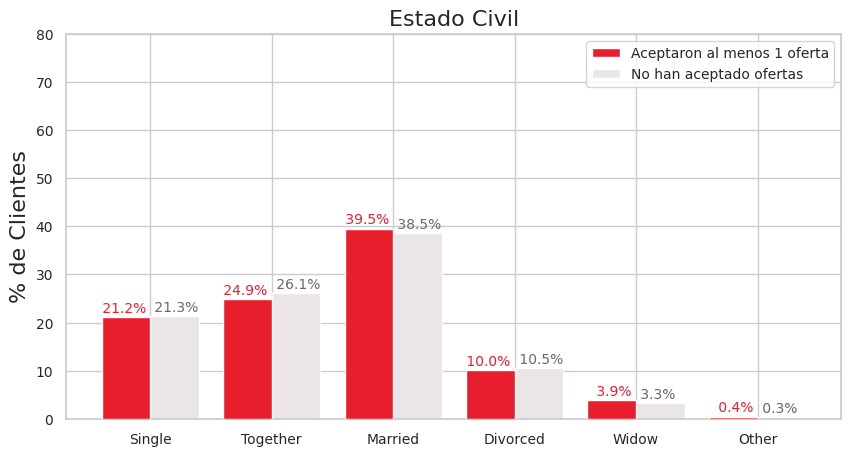

In [54]:
# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 5))

x1 = Marital_group.Marital_Status
y1 = Marital_group.perc_acc
x2 = Marital_group.Marital_Status
y2 = Marital_group.perc_no

# Barras
rects1 = ax.bar(x1, y1, width=-0.4, label='Aceptaron al menos 1 oferta', zorder=3, color='#E81E2C', align='edge')
rects2 = ax.bar(x1, y2, width=0.4, label='No han aceptado ofertas', zorder=2, color='#EBE6E6', align='edge')

# Agregar texto sobre las barras
for i in range(len(y1)):
    # Para perc_acc (primer conjunto de barras)
    ax.text(x1[i], y1[i] + 1, ' '+ str(np.round(y1[i], decimals=1)) + '% ', fontsize=10, ha='right', color='#E81E2C', rotation='horizontal')
    # Para perc_no (segundo conjunto de barras)
    ax.text(x2[i], y2[i] + 1, ' '+ str(np.round(y2[i], decimals=1)) + '%', fontsize=10, ha='left', color='#6E6567', rotation='horizontal')

# Organizar las etiquetas y ejes
ax.set_ylabel('% de Clientes', fontsize=16)
ax.set_title('Estado Civil', fontsize=16)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.legend()

ax.set_ylim(0, 80)
plt.xticks(fontsize=10, rotation='horizontal')
plt.yticks(fontsize=10)

ax.grid(zorder=0)
ax.legend(fontsize=10)

# Guardar el gráfico en un archivo
#plt.savefig(path_images+'fig_7.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

**Figura 7:** Estado civil de los clientes que aceptaron al menos una oferta versus los clientes que no aceptaron ninguna oferta

### 3.3) Niños pequeños en casa

Veamos cómo difiere el número de niños en casa entre los grupos.

In [55]:
group_acc=accepted.groupby(["Kidhome"])["ID"].nunique().reset_index()
group_no=no_accepted.groupby("Kidhome")["ID"].nunique().reset_index()

group_acc["perc_acc"] = 100*(group_acc.ID/(group_acc.ID.sum()))
group_no["perc_no"] = 100*(group_no.ID/(group_no.ID.sum()))
Kid_group=(pd.merge(group_acc,group_no,on='Kidhome'))
Kid_group = Kid_group.rename(columns = {'ID_x': 'quant_acc', 'ID_y': 'quant_no'}, inplace = False)
print(Kid_group)

   Kidhome  quant_acc   perc_acc  quant_no    perc_no
0        0        356  77.729258       925  52.736602
1        1         99  21.615721       786  44.811859
2        2          3   0.655022        43   2.451539


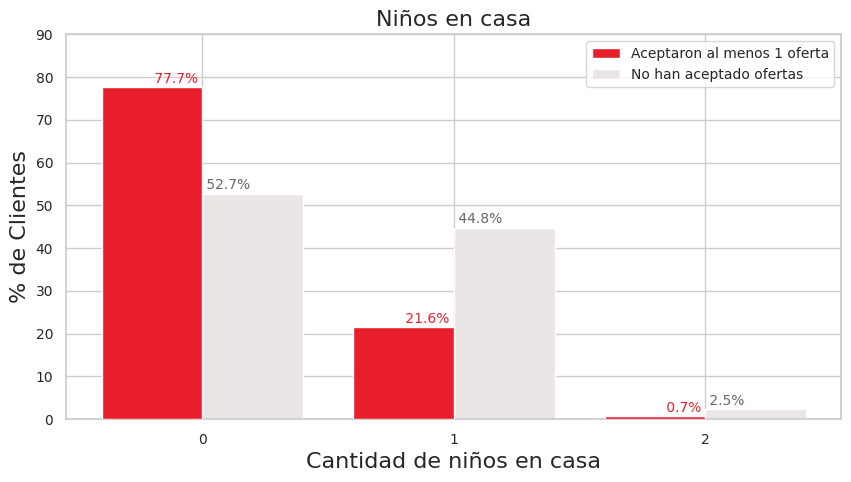

In [56]:
# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 5))

x1 = Kid_group.Kidhome
y1 = Kid_group.perc_acc
x2 = Kid_group.Kidhome
y2 = Kid_group.perc_no

# Barras
rects1 = ax.bar(x1, y1, width=-0.4, label='Aceptaron al menos 1 oferta', zorder=3, color='#E81E2C', align='edge')
rects2 = ax.bar(x1, y2, width=0.4, label='No han aceptado ofertas', zorder=2, color='#EBE6E6', align='edge')

# Agregar texto sobre las barras
for i in range(len(y1)):
    # Para perc_acc (primer conjunto de barras)
    ax.text(x1[i], y1[i] + 1, ' '+  str(np.round(y1[i], decimals=1)) + '% ', fontsize=10, ha='right', color='#E81E2C', rotation='horizontal')
    # Para perc_no (segundo conjunto de barras)
    ax.text(x2[i], y2[i] + 1, ' '+ str(np.round(y2[i], decimals=1)) + '%', fontsize=10, ha='left', color='#6E6567', rotation='horizontal')

# Organizar las etiquetas y ejes
ax.set_xlabel('Cantidad de niños en casa',fontsize=16)
ax.set_ylabel('% de Clientes', fontsize=16)
ax.set_title('Niños en casa', fontsize=16)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.legend()

ax.set_ylim(0, 90)
plt.xticks(fontsize=10, rotation='horizontal')
plt.yticks(fontsize=10)

ax.grid(zorder=0)
ax.legend(fontsize=10)

# Guardar el gráfico en un archivo
#plt.savefig(path_images+'fig_8.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

**Figura 8:** Número de niños pequeños en casa de los clientes que aceptaron al menos una oferta versus clientes que no aceptaron ninguna oferta.

* Como podemos observar, un mayor porcentaje de los clientes que aceptaron la oferta no tienen niños pequeños en casa.

### 3.4) Adolescentes en casa

In [57]:
group_acc=accepted.groupby(["Teenhome"])["ID"].nunique().reset_index()
group_no=no_accepted.groupby("Teenhome")["ID"].nunique().reset_index()

group_acc["perc_acc"] = 100*(group_acc.ID/(group_acc.ID.sum()))
group_no["perc_no"] = 100*(group_no.ID/(group_no.ID.sum()))
Teen_group=(pd.merge(group_acc,group_no,on='Teenhome'))
Teen_group = Teen_group.rename(columns = {'ID_x': 'quant_acc', 'ID_y': 'quant_no'}, inplace = False)
print(Teen_group)

   Teenhome  quant_acc   perc_acc  quant_no    perc_no
0         0        285  62.227074       859  48.973774
1         1        163  35.589520       854  48.688712
2         2         10   2.183406        41   2.337514


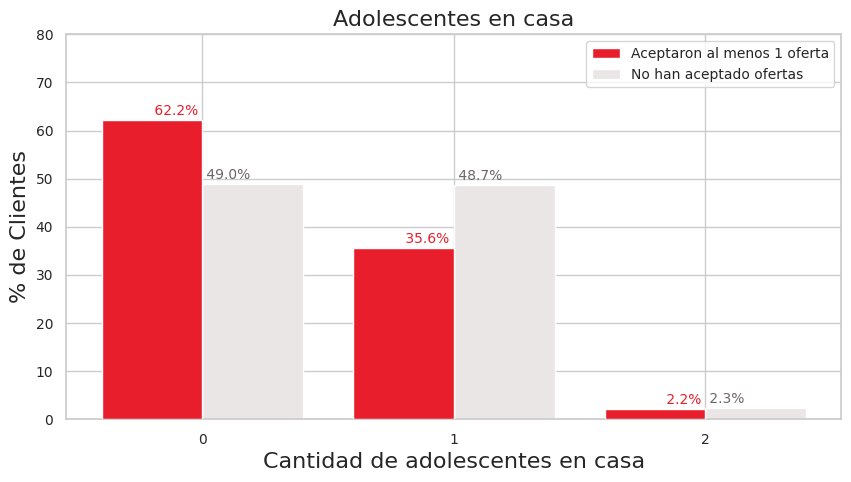

In [58]:
# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 5))


x1 = Teen_group.Teenhome
y1 = Teen_group.perc_acc

x2 = Teen_group.Teenhome
y2 = Teen_group.perc_no

# Barras
rects1 = ax.bar(x1, y1, width=-0.4, label='Aceptaron al menos 1 oferta', zorder=3, color='#E81E2C', align='edge')
rects2 = ax.bar(x1, y2, width=0.4, label='No han aceptado ofertas', zorder=2, color='#EBE6E6', align='edge')

# Agregar texto sobre las barras
for i in range(len(y1)):
    # Para perc_acc (primer conjunto de barras)
    ax.text(x1[i], y1[i] + 1, ' '+ str(np.round(y1[i], decimals=1)) + '% ', fontsize=10, ha='right', color='#E81E2C', rotation='horizontal')
    # Para perc_no (segundo conjunto de barras)
    ax.text(x2[i], y2[i] + 1, ' '+ str(np.round(y2[i], decimals=1)) + '%', fontsize=10, ha='left', color='#6E6567', rotation='horizontal')

# Organizar las etiquetas y ejes
ax.set_xlabel('Cantidad de adolescentes en casa',fontsize=16)
ax.set_ylabel('% de Clientes', fontsize=16)
ax.set_title('Adolescentes en casa', fontsize=16)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.legend()

ax.set_ylim(0, 80)
plt.xticks(fontsize=10, rotation='horizontal')
plt.yticks(fontsize=10)

ax.grid(zorder=0)
ax.legend(fontsize=10)

# Guardar el gráfico en un archivo
#plt.savefig(path_images+'fig_9.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

**Figura 9:** Número de adolescentes en el hogar de los clientes que aceptaron al menos una oferta versus clientes que no aceptaron ninguna oferta.

* Como podemos observar, un mayor porcentaje de los clientes que aceptaron la oferta no tienen adolescentes en el hogar.

### 3.5) Edad

Describiremos el rango de edad de los clientes que han aceptado ofertas

In [59]:
# Obtener las estadísticas descriptivas de "Age" para ambos DataFrames
accepted_age_desc = accepted['Age'].describe().T
no_accepted_age_desc = no_accepted['Age'].describe().T

# Combinar ambas descripciones en un solo DataFrame
combined_desc = pd.concat([accepted_age_desc, no_accepted_age_desc], axis=1)

# Mostrar el resultado
combined_desc.columns = ['Aceptado', 'No Aceptado']
print(combined_desc)

         Aceptado  No Aceptado
count  458.000000  1754.000000
mean    55.786026    54.903649
std     12.542185    11.468718
min     28.000000    28.000000
25%     46.000000    47.000000
50%     55.000000    54.000000
75%     66.000000    64.000000
max     83.000000    84.000000


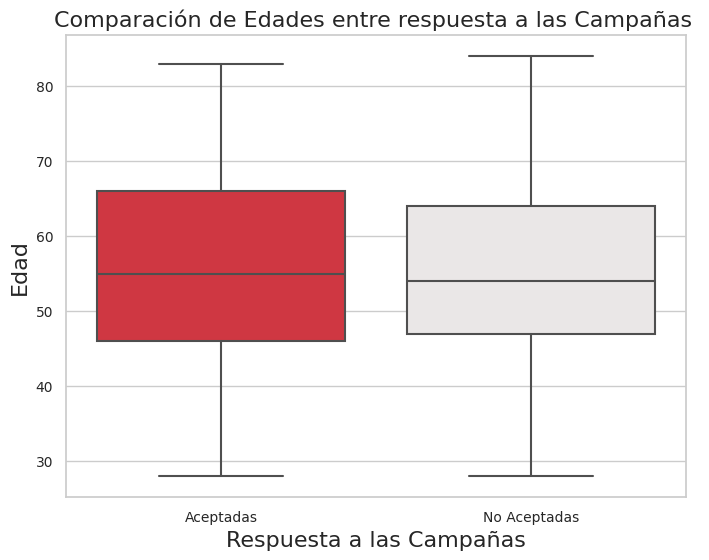

In [60]:
# Crear un DataFrame con los valores de "Age" de cada grupo
age_accepted_group = pd.DataFrame({'Age': accepted['Age'], 'Group': 'Aceptadas'})
age_no_accepted_group = pd.DataFrame({'Age': no_accepted['Age'], 'Group': 'No Aceptadas'})

# Concatenar ambos DataFrames en uno solo
combined_data = pd.concat([age_accepted_group, age_no_accepted_group])

# Crear el gráfico de cajas para ambos grupos
plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y='Age', data=combined_data, palette=['#E81E2C', '#EBE6E6'])

# Añadir título y etiquetas
plt.title("Comparación de Edades entre respuesta a las Campañas ", fontsize=16)
plt.xlabel("Respuesta a las Campañas", fontsize=16)
plt.ylabel("Edad", fontsize=16)
plt.tick_params(labelsize=10)
ax.legend()

# Guardar el gráfico en un archivo
#plt.savefig(path_images+'fig_10.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

**Figura 10:** Diagrama de caja y cola con la distribución de ingresos de edades de los clientes que aceptaron las ofertas.

En cuanto a la edad:
* El valor mediano de los clientes que aceptaron la oferta es de 55 años, y la distribución de edades varía entre 28 y 83 años
* Mientras que para los clientes que no aceptaron, el valor mediano es de 54 años, y la distribución de edades varía entre 28 y 84 años.
* Vemos que la edad no muestra una respuesta no esperada respecto a las campañas lanzadas antes, por lo que descartamos temas de copywriting y tono al público a quien va dirigido y similares.

### 3.6) Medianas y Ratios

Calculemos los valores medianos de las variables para los clientes que aceptaron la oferta y los que no la aceptaron.
* Usamos los valores medianos para que los valores atípicos no afecten el valor

In [61]:
Medianas = pd.DataFrame()
Medianas['med_acc'] = accepted.select_dtypes(include=['number']).median()
Medianas['med_no_acc'] = no_accepted.select_dtypes(include=['number']).median()
Medianas

,med_acc,med_no_acc
ID,5195.0,5548.5
Year_Birth,1969.0,1970.0
Income,69918.0,46927.0
Kidhome,0.0,0.0
Teenhome,0.0,1.0
Recency,47.0,50.0
MntWines,597.0,104.5
MntFruits,20.5,7.0
MntMeatProducts,187.5,50.0
MntFishProducts,29.0,10.5


Excluyendo las variables que no necesitamos (las categoricas) y calculando la relación entre los valores de los dos grupos

In [62]:
med2=Medianas.drop(labels=["ID", "Year_Birth", "Kidhome","Teenhome","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2","Complain","Response","Marital_ID","Education_ID","AcceptedCmpOverall"])
med2['ratio'] = (med2.med_acc/med2.med_no_acc)
med2

,med_acc,med_no_acc,ratio
Income,69918.0,46927.0,1.489931
Recency,47.0,50.0,0.940000
MntWines,597.0,104.5,5.712919
MntFruits,20.5,7.0,2.928571
MntMeatProducts,187.5,50.0,3.750000
MntFishProducts,29.0,10.5,2.761905
MntSweetProducts,19.5,7.0,2.785714
MntGoldProds,39.0,20.0,1.950000
NumDealsPurchases,1.0,2.0,0.500000
NumWebPurchases,5.0,3.0,1.666667


Grafico de barras de la relación de los clientes que aceptaron la oferta versus los que no aceptaron ninguna oferta separados por categorías

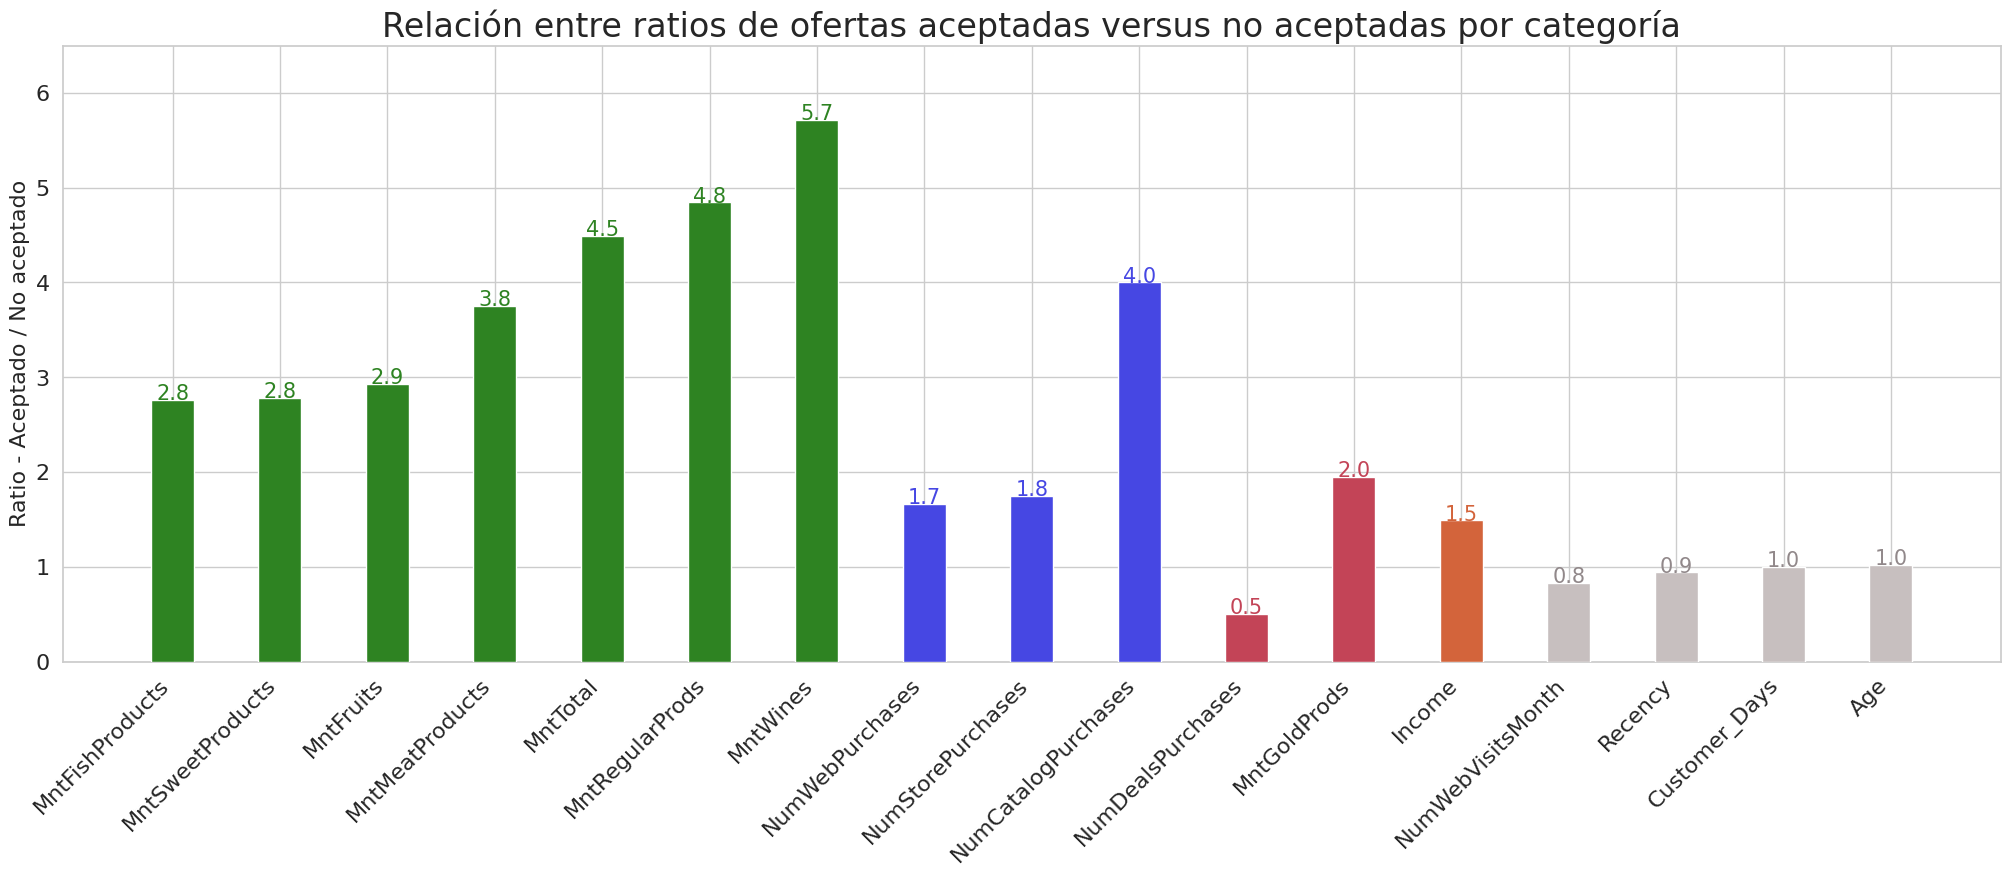

In [63]:
# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(25, 8))

# Gastos
x1 = (pd.concat([med2.ratio.iloc[2:7], med2.ratio.iloc[[15,16]]])).sort_values().index
y1 = (pd.concat([med2.ratio.iloc[2:7], med2.ratio.iloc[[15,16]]])).sort_values()

# Cantidad de Compras
x2 = med2.ratio.iloc[9:12].sort_values().index
y2 = med2.ratio.iloc[9:12].sort_values()

# Ofertas y productos gold
x3 = med2.ratio.iloc[7:9].sort_values().index
y3 = med2.ratio.iloc[7:9].sort_values()

# Ingresos
x4 = med2.ratio.iloc[[0]].sort_values().index
y4 = med2.ratio.iloc[[0]].sort_values()

# Otras variables
x5 = med2.ratio.iloc[[1, 12, 13, 14]].sort_values().index
y5 = med2.ratio.iloc[[1, 12, 13, 14]].sort_values()

# Crear las barras
rects1 = ax.bar(x1, y1, width=-0.4, zorder=3, color='#2e8322', align='center')
rects2 = ax.bar(x2, y2, width=-0.4, zorder=3, color='#4647e3', align='center')
rects3 = ax.bar(x3, y3, width=-0.4, zorder=3, color='#c34457', align='center')
rects4 = ax.bar(x4, y4, width=-0.4, zorder=3, color='#d3643b', align='center')
rects5 = ax.bar(x5, y5, width=-0.4, zorder=3, color='#C7BFBF', align='center')

# Añadir los textos en cada barra
for i in range(len(y1)):
    ax.text(x1[i], y1.iloc[i], str(np.round(y1.iloc[i], decimals=1)), fontsize=15, ha='center', color='#2e8322', rotation='horizontal')

for i in range(len(y2)):
    ax.text(x2[i], y2.iloc[i], str(np.round(y2.iloc[i], decimals=1)), fontsize=15, ha='center', color='#4647e3', rotation='horizontal')

for i in range(len(y3)):
    ax.text(x3[i], y3.iloc[i], str(np.round(y3.iloc[i], decimals=1)), fontsize=15, ha='center', color='#c34457', rotation='horizontal')

for i in range(len(y4)):
    ax.text(x4[i], y4.iloc[i], str(np.round(y4.iloc[i], decimals=1)), fontsize=15, ha='center', color='#d3643b', rotation='horizontal')

for i in range(len(y5)):
    ax.text(x5[i], y5.iloc[i], str(np.round(y5.iloc[i], decimals=1)), fontsize=15, ha='center', color='#91888A', rotation='horizontal')

# Organizar las etiquetas y el eje
ax.set_ylabel("Ratio - Aceptado / No aceptado", fontsize=16)
ax.set_title("Relación entre ratios de ofertas aceptadas versus no aceptadas por categoría", fontsize=24)
ax.set_ylim(0, 6.5)

plt.xticks(fontsize=16, rotation=45, ha='right')
plt.yticks(fontsize=16)

ax.grid(zorder=0)

# Guardar el gráfico en un archivo
plt.savefig(path_images+'fig_11.png', dpi=300, bbox_inches='tight')


**Figura 11:** Relación entre los ratios de los clientes que aceptaron al menos una oferta versus clientes que no aceptaron ninguna oferta separados por categorías.

# 4) Segmentación de Clientes | Análisis RFM 👥

In [64]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital_ID,Education_ID
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,67,4463,1617,1529,0,0,2
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,70,3913,27,21,0,0,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,59,4112,776,734,0,1,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,40,3939,53,48,0,1,2
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,43,3961,422,407,0,2,4


In [65]:
data.shape

(2212, 34)

Tenemos un dataset con **2212 filas** y **34 columnas**

## 4.1) Análisis RFM 📅



---
> El **análisis RFM** (Recency, Frequency, Monetary) permite comprender el comportamiento de los clientes y segmentarlos en función de sus patrones de compra.

Se basa en tres métricas clave:

* Actualidad/Recencia: Cuánto tiempo desde que un cliente hizo su última compra
* Frecuencia: la frecuencia con la que un cliente realiza compras
* Monetario: cuánto dinero gasta un cliente en compras

Este análisis ayuda a las empresas a identificar a sus clientes más valiosos, adaptar las estrategias de marketing y optimizar la gestión de las relaciones con los clientes.

---



Para esta segmentación se considerará los valores RFM (Actualidad, Frecuencia y Valor Monetario) de los clientes, de esta forma sabremos los mejores clientes en base a su comportamiento histórico.

* Los mejores clientes serán aquellos con valores de Frecuencia y Valor Monetario altos, es decir que compran y gastan más y que ademas que realizaron una compra hace poco tiempo, siendo clientes activos.

Ya tenemos el valor de Recencia (`Recency`) en nuestros datos, pero necesitamos calcular la Frecuencia y el Valor Monetario.

In [66]:
#Crear el DataFrame
data_rfm=pd.DataFrame()
data_rfm["ID"] = data.ID
data_rfm["Recency"] = data.Recency

# Frecuencia: La suma de las compras de estos distintos canales.
data_rfm["Frequency"] = (data.NumDealsPurchases + data.NumCatalogPurchases + data.NumWebPurchases + data.NumStorePurchases) # Consideramos todos los tipos de compras

# Valor Monetario: La suma de todos los productos comprados
data_rfm["Monetary"]=(data.MntTotal) # Consideramos los productos de Vino, Frutas, Carnes, Pescados, Dulces y Procutos Gold
data_rfm.head()

,ID,Recency,Frequency,Monetary
0,5524,58,25,1617
1,2174,38,6,27
2,4141,26,21,776
3,6182,26,8,53
4,5324,94,19,422


In [67]:
# Asignarle un valor de puntuación a cada atributo de acuerdo con sus valores de cuartil. Cuanto mayor sea la puntuación, mejor será el cliente.
data_rfm['r_score'] = pd.qcut(data_rfm['Recency'], 4, [4,3,2,1])
data_rfm['f_score'] = pd.qcut(data_rfm['Frequency'], 4, [1,2,3,4])
data_rfm['m_score'] = pd.qcut(data_rfm['Monetary'], 4, [1,2,3,4])
data_rfm.head()

,ID,Recency,Frequency,Monetary,r_score,f_score,m_score
0,5524,58,25,1617,2,4,4
1,2174,38,6,27,3,1,1
2,4141,26,21,776,3,3,3
3,6182,26,8,53,3,1,1
4,5324,94,19,422,1,3,3


In [68]:
# Añadimos las columas de cada puntuación al dataset
data_rfm['r_score']=data_rfm.r_score.astype('int64')
data_rfm['f_score']=data_rfm.f_score.astype('int64')
data_rfm['m_score']=data_rfm.m_score.astype('int64')

In [69]:
data_rfm['rfm_score'] = (data_rfm['r_score'] + data_rfm['f_score'] + data_rfm['m_score'])

## 4.2) Segmentación Manual #️⃣

* Para este caso la puntuación final será la suma de las 3 puntuaciones, dando el mismo peso a los 3 atributos
* La puntuación más alta posible es 12 y la más baja es 3

In [70]:
#Etiquetemos 5 grupos según el valor "rfm_score".
data_rfm['group'] = pd.cut(data_rfm['rfm_score'], [3,6,8,9,11,13],right = False, labels = ['Inferior','Low','Medium','High','Top']) # Despues lo haremos automatico con K-Means

In [71]:
# Le añadimos un ID a cada grupo
data_rfm['group'] = data_rfm['group'].astype('category') # Cambiamos una variable categorica

# Renombrar las categorías usando el mapeo
mapping = {'Inferior': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Top': 4}
data_rfm['group_ID'] = data_rfm['group'].cat.rename_categories(mapping)

In [72]:
data_rfm.head()

,ID,Recency,Frequency,Monetary,r_score,f_score,m_score,rfm_score,group,group_ID
0,5524,58,25,1617,2,4,4,10,High,3
1,2174,38,6,27,3,1,1,5,Inferior,0
2,4141,26,21,776,3,3,3,9,High,3
3,6182,26,8,53,3,1,1,5,Inferior,0
4,5324,94,19,422,1,3,3,7,Low,1


### Distribución de Clientes por Grupo

In [73]:
# Contar cuántos clientes únicos hay por categoría de clúster
unique_client_counts = data_rfm.groupby('group', observed=False)['ID'].nunique()

# Calcular el porcentaje que representa cada categoría (en términos de clientes únicos)
total_unique_clients = data_rfm['ID'].nunique()
unique_client_percentages = (unique_client_counts / total_unique_clients) * 100

# Crear un DataFrame con los resultados
rfm_client_summary = pd.DataFrame({
    'customers': unique_client_counts,
    'perc_group': unique_client_percentages
})

# Mostrar los resultados
print(rfm_client_summary.round(2))

          customers  perc_group
group                          
Inferior        568       25.68
Low             504       22.78
Medium          312       14.10
High            567       25.63
Top             261       11.80


<ipython-input-74-c7a752413f87>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.bar(x1[i],y1[i],width =-0.4,zorder=3,color=my_colors[i],align='center')
<ipython-input-74-c7a752413f87>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(x1[i], y1[i],str(np.round(y1[i],decimals=1))+'%',fontsize =15,ha= 'center',color=my_colors[i],rotation='horizontal')


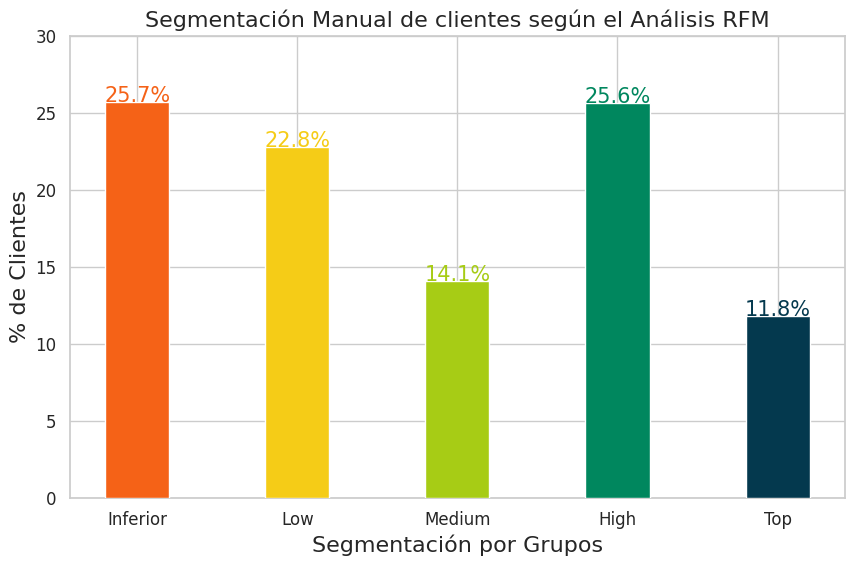

In [74]:
#Graficar el porcentaje de clientes en cada grupo
fig, ax = plt.subplots(figsize = (10,6))

x1 = rfm_client_summary.index
y1 = rfm_client_summary.perc_group

my_colors=['#f56217','#f5cc17','#a7cc15','#00875e','#04394e']

for i in range(len(y1)):
    ax.bar(x1[i],y1[i],width =-0.4,zorder=3,color=my_colors[i],align='center')
    ax.text(x1[i], y1[i],str(np.round(y1[i],decimals=1))+'%',fontsize =15,ha= 'center',color=my_colors[i],rotation='horizontal')



# organizing the labels and axis
ax.set_xlabel('Segmentación por Grupos',fontsize=16)
ax.set_ylabel("% de Clientes",fontsize=16)
ax.set_title("Segmentación Manual de clientes según el Análisis RFM",fontsize=16)

ax.set_ylim(0,30)
plt.xticks(fontsize = 12,rotation='horizontal',ha='center')
plt.yticks(fontsize = 12)

ax.grid(zorder=0)

# Guardar el gráfico en un archivo
#plt.savefig(path_images+'fig_12.png', dpi=300, bbox_inches='tight')

**Figura 12:** % de clientes en cada grupo de segmentación (Análisis RFM)

In [75]:
# Calcular el valor mediano de la recency, frecuencia y valor monetario para cada grupo
group_r = data_rfm.groupby(["group"], observed=True)["Recency"].median().reset_index()
group_f = data_rfm.groupby(["group"], observed=True)["Frequency"].median().reset_index()
group_m = data_rfm.groupby(["group"], observed=True)["Monetary"].median().reset_index()

In [76]:
median_rfm=pd.merge(pd.merge(group_r,group_f,on='group'),group_m,on='group')
median_rfm

,group,Recency,Frequency,Monetary
0,Inferior,71.5,6.0,49.5
1,Low,40.0,10.0,136.0
2,Medium,63.0,17.0,577.5
3,High,48.0,21.0,1076.0
4,Top,17.0,23.0,1260.0


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

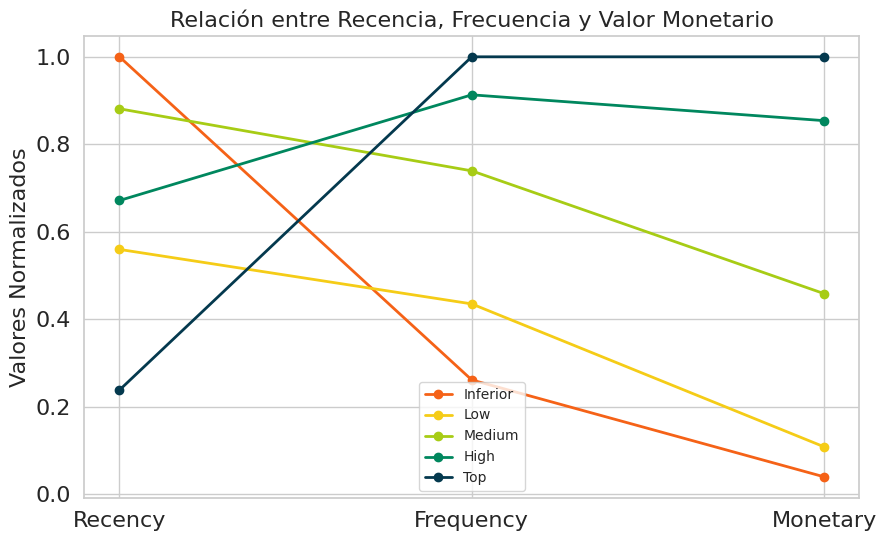

In [77]:
#Graficar los valores normalizados (divididos por el valor más alto) para comparar el valor mediano de cada grupo
aux = median_rfm.values

my_colors=['#f56217','#f5cc17','#a7cc15','#00875e','#04394e']

plt.figure(figsize = [10,6])
for i in range(aux.shape[1]+1):
    plt.plot(median_rfm.columns[1:],aux[i,1:]/aux[:,1:].max(0),linewidth = 2,marker='o',color=my_colors[i])

plt.legend(aux[:,0],fontsize = 10)
plt.grid(zorder=0)

plt.ylabel("Valores Normalizados",fontsize=16)
plt.title("Relación entre Recencia, Frecuencia y Valor Monetario",fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

# Guardar el gráfico en un archivo
#plt.savefig(path_images+'fig_13.png', dpi=300, bbox_inches='tight')

**Figura 13:** Valores normalizados (divididos por el valor más alto) para comparar los valores de recencia, frecuencia y valor monetario para cada grupo

Como podemos observar:
* El grupo “Top” tiene los valores más altos de Frecuencia y Valor Monetario y los más bajos de Recencia, representando a nuestros mejores clientes
* Mientras que el grupo “Inferior” serían los clientes que compraron y gastaron menos y no compraron durante un tiempo más largo.
* Es interesante notar que el grupo “High” tiene un valor medio de Recencia mayor que el grupo “Low”, pero valores mucho mejores para la Frecuencia y Recencia.

#### ⭐**Bonus:** Por si se exportan los clientes junto al grupo al que pertenecen como CSV

In [78]:
# Mostramos lo que se va a exportar
data_rfm.head()

,ID,Recency,Frequency,Monetary,r_score,f_score,m_score,rfm_score,group,group_ID
0,5524,58,25,1617,2,4,4,10,High,3
1,2174,38,6,27,3,1,1,5,Inferior,0
2,4141,26,21,776,3,3,3,9,High,3
3,6182,26,8,53,3,1,1,5,Inferior,0
4,5324,94,19,422,1,3,3,7,Low,1


In [79]:
# Exportar como CSV
#data_rfm.to_csv(path_files+'data_rfm.csv', index=False)  # 'index=False' para no incluir la columna de índices en el archivo

In [80]:
# Desglose de Clientes por Cluster
group_counts = data_rfm['group'].value_counts()
print(group_counts)

group
Inferior    568
High        567
Low         504
Medium      312
Top         261
Name: count, dtype: int64


## 4.3) Relación entre Clientes y puntaje RFM 🔀

In [81]:
#Juntar la puntuación con la aceptación y respuesta de la campaña
Merge=(pd.merge(data_rfm,data[['ID','Response','AcceptedCmpOverall']],how='left',left_on="ID",right_on='ID'))
Merge.head()

,ID,Recency,Frequency,Monetary,r_score,f_score,m_score,rfm_score,group,group_ID,Response,AcceptedCmpOverall
0,5524,58,25,1617,2,4,4,10,High,3,1,0
1,2174,38,6,27,3,1,1,5,Inferior,0,0,0
2,4141,26,21,776,3,3,3,9,High,3,0,0
3,6182,26,8,53,3,1,1,5,Inferior,0,0,0
4,5324,94,19,422,1,3,3,7,Low,1,0,0


In [82]:
#Clientes que aceptaron al menos una oferta
#Aceptó al menos 1 oferta
camp = Merge[Merge.AcceptedCmpOverall>0]
#Encuestados de la 6ta Campaña (Ultima campaña)
resp = Merge[Merge.Response>0]

### 4.3.1) Todos los Clientes

<ipython-input-83-637220fefc75>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_rfm['rfm_score'], hist=True, kde=True,
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


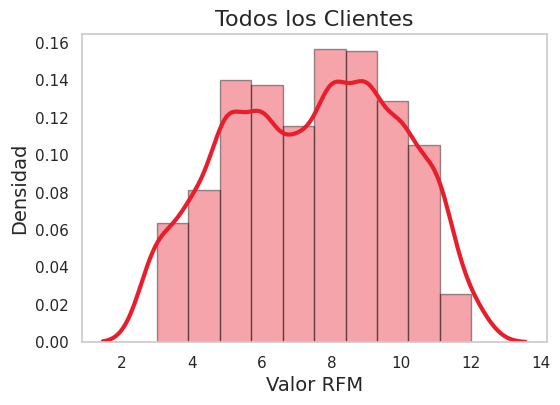

In [83]:
# Distribución de #rfm_score con todos los clientes
plt.figure(figsize = [6,4])
sns.distplot(data_rfm['rfm_score'], hist=True, kde=True,
             bins=10, color = '#E81E2C',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
plt.title("Todos los Clientes",fontsize=16)
plt.xlabel("Valor RFM",fontsize=14)
plt.ylabel("Densidad",fontsize=14)
plt.grid(visible=None)

# Guardar el gráfico en un archivo
#plt.savefig(path_images+'fig_14.png', dpi=300, bbox_inches='tight')

**Figura 14:** Distribución de los puntajes rfm de todos los clientes

### 4.3.2) Clientes que aceptaron al menos 1 oferta

<ipython-input-84-865d3f7489f1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(camp['rfm_score'], hist=True, kde=True,
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


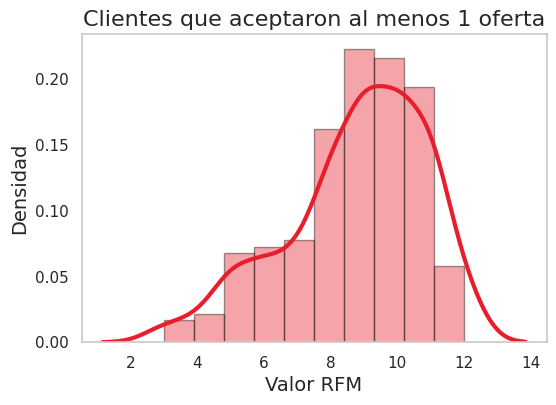

In [84]:
# Distribución de #rfm_score con los clientes que aceptaron al menos una oferta
plt.figure(figsize = [6,4])
sns.distplot(camp['rfm_score'], hist=True, kde=True,
             bins=10, color = '#E81E2C',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
plt.title("Clientes que aceptaron al menos 1 oferta",fontsize=16)
plt.xlabel("Valor RFM",fontsize=14)
plt.ylabel("Densidad",fontsize=14)
plt.grid(visible=None)

# Guardar el gráfico en un archivo
#plt.savefig(path_images+'fig_15.png', dpi=300, bbox_inches='tight')

**Figura 15:** Distribución del puntaje rfm de los clientes que aceptaron al menos 1 oferta

### 4.3.3) Participación en la última Campaña

<ipython-input-85-edd37e0490f9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resp['rfm_score'], hist=True, kde=True,
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


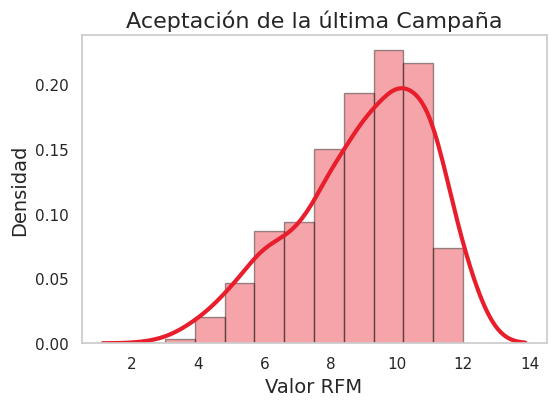

In [85]:
# Distribución de #rfm_score entre los clientes que aceptaron la 6ª Campaña
plt.figure(figsize = [6,4])
sns.distplot(resp['rfm_score'], hist=True, kde=True,
             bins=10, color = '#E81E2C',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
plt.title("Aceptación de la última Campaña",fontsize=16)
plt.xlabel("Valor RFM",fontsize=14)
plt.ylabel("Densidad",fontsize=14)
plt.grid(visible=None)

# Guardar el gráfico en un archivo
#plt.savefig(path_images+'fig_16.png', dpi=300, bbox_inches='tight')

**Figura 16:** Distribución de la puntuación rfm de los clientes que respondieron a la última campaña

Observaciones:
* Comparando las 3 distribuciones, podemos ver que los clientes que participan en las campañas tienen puntuaciones más altas que toda la base de clientes.
* Por lo tanto, con esa segmentación simple podríamos aumentar el ROI de la campaña seleccionando solo a nuestros mejores clientes, digamos, el grupo Medium, High y Top

## 4.4) Mejores Clientes 👑

Consideraremos solo los grupos Medium, High y Top, los cuales tienen una puntuación RFM mínima de 8

In [86]:
#Solo los mejores clientes (Top, High y Medium)
best=Merge[Merge.rfm_score >=8]

In [87]:
#Comparar los clientes de todo el dataset versus solo los mejores clientes
Comparing = pd.DataFrame()

# Clientes unicos
Comparing['Unique_Customers'] = [Merge.ID.nunique(), best.ID.nunique(), 100*(Merge.ID.nunique()-best.ID.nunique())/Merge.ID.nunique()] # combinar los dataframes

# Productos Vendidos
Comparing['Gadgets_sold'] = [Merge.AcceptedCmpOverall.sum(),best.AcceptedCmpOverall.sum(),100*(Merge.AcceptedCmpOverall.sum()-best.AcceptedCmpOverall.sum())/Merge.AcceptedCmpOverall.sum()] # combinar los dataframes

Comparing.index = ['Todos los Clientes','Mejores Clientes', 'Diferencia(%)']

In [88]:
Comparing.round(2)

,Unique_Customers,Gadgets_sold
Todos los Clientes,2212.00,660.00
Mejores Clientes,1140.00,547.00
Diferencia(%),48.46,17.12


Conclusiones:
* Utilizando esta segmentación de clientes sencilla, si desde la Campaña 1 consideramos contactar solo al grupo Top, High y Medium que representan a nuestros clientes más activos y leales, reduciríamos los costos de contacto en un 48,46%.
* A pesar de contactar a menos clientes, los ingresos por los productos vendidos disminuirían en solo un 17,12%. Es mucho más bajo que la reducción en la cantidad de clientes.

### ⭐**Bonus:** Por si se exporta como CSV este grupo 📃

In [89]:
# Quitamos las columnas que no queremos exportar
best_group=best.drop(['Response', 'AcceptedCmpOverall'], axis = 1)

In [90]:
# Mostramos lo que se va a exportar
best_group.head()

,ID,Recency,Frequency,Monetary,r_score,f_score,m_score,rfm_score,group,group_ID
0,5524,58,25,1617,2,4,4,10,High,3
2,4141,26,21,776,3,3,3,9,High,3
5,7446,16,22,716,4,4,3,11,Top,4
6,965,34,21,590,3,3,3,9,High,3
11,2125,82,16,1102,1,3,4,8,Medium,2


In [91]:
# Exportar como CSV
#best_group.to_csv(path_files+'best_group.csv', index=False)  # 'index=False' para no incluir la columna de índices en el archivo

In [92]:
# Desglose de Mejores Clientes por Cluster
group_counts = best_group['group'].value_counts()
print(group_counts)

group
High        567
Medium      312
Top         261
Inferior      0
Low           0
Name: count, dtype: int64


### 4.4.1) Oportunidades de mejora 🚀
* De antemano en la última campaña, sabemos que el costo total de la campaña de muestra fue de 6.720MU y los ingresos generados por los clientes que aceptaron la oferta fueron de 3.674MU. Lo que dio un **ROI del -45%**

> ROI = (Ingresos - Costo) / Costo * 100%

Si nos concentráramos únicamente en nuestros mejores clientes:

* Al contactar una menor cantidad de clientes tendriamos un costo total de campaña 48.46% menor que si contactaramos todos los clientes, de tal manera que el costo proyectado sería 3.463,49UM
* Los ingresos esperadas considerando la diferencia de reducir la cantidad de clientes es una reducción del 17.12% en las ventas, de tal manera que las ventas proyectadas serian 3.045,01UM.
* Luego **se obtendría un ROI del -12,08%**, veremos que lo podremos mejorar aún un poco más.

> **Aumentaríamos el ROI de la campaña de un -45% a un -12,08%.** Todavía no es la situación ideal, pero ya está mucho mejor.


# 5) Optimización de la Segmentación de Clientes | Clustering con K-Means 🚀



---
**Algoritmo K-Means**

El objetivo de K-Means es claro: agrupar observaciones similares para descubrir patrones que a simple vista se desconocen. Para conseguirlo, el algoritmo busca un número fijo (k) de clústers en el dataset.

Se basa en identificar grupos en los datos de tal manera que todos los datos del grupo (clúster) son datos con características similares mientras que los datos de los otros grupos son diferentes.

---



## 5.1) Crear dataset 📥


Segmentación en base al puntaje RFM

In [93]:
# Crear Dataframe
kmeans_rfm_data = pd.DataFrame()

# Seleccionamos las columnas RFM
kmeans_rfm_data["Recency"] = data_rfm.Recency
kmeans_rfm_data["Frequency"] = data_rfm.Frequency
kmeans_rfm_data["Monetary"] = data_rfm.Monetary

In [94]:
kmeans_rfm_data.head()

,Recency,Frequency,Monetary
0,58,25,1617
1,38,6,27
2,26,21,776
3,26,8,53
4,94,19,422


## 5.2) Normalizar los datos 📋

In [95]:
# Normalizar
from sklearn.preprocessing import StandardScaler

In [96]:
# Normalizamos los datos
std_scaler = StandardScaler()
std_scaler.fit(kmeans_rfm_data)
kmeans_rfm_data_norm=std_scaler.transform(kmeans_rfm_data)

In [97]:
# A ver que hizo!?
pd.DataFrame(kmeans_rfm_data_norm).describe()

,0,1,2
count,2.212000e+03,2.212000e+03,2.212000e+03
mean,4.015273e-18,-8.030546e-18,5.942604e-17
std,1.000226e+00,1.000226e+00,1.000226e+00
min,-1.694030e+00,-1.941552e+00,-9.998189e-01
25%,-8.646302e-01,-8.985131e-01,-8.935732e-01
50%,-6.717941e-04,1.414610e-02,-3.490638e-01
75%,8.632866e-01,7.964254e-01,7.316544e-01
max,1.727245e+00,3.795163e+00,3.183607e+00


## 5.3) Crear un Modelo 💻

Asignamos un valor inicial de la cantidad de cluster

In [98]:
# Crear Modelo
from sklearn.cluster import KMeans

In [99]:
cl_model = KMeans(
    n_clusters=5,     # el parámetro importante!
    init='k-means++', # k-means++ acelera la convergencia, respecto de random
    max_iter=100,
    random_state=0,
    n_init='auto'     # Para evitar warnings más adelante
)

cl_model.fit(kmeans_rfm_data_norm)

KMeans(max_iter=100, n_clusters=5, random_state=0)

In [100]:
pred_cl = cl_model.predict(kmeans_rfm_data_norm)

# Número de cluster:
pred_cl

array([4, 3, 1, ..., 2, 1, 3], dtype=int32)

## 5.4) ⭐**Bonus:** Determinar la cantidad de cluster óptimo 📃

Optimizar la cantidad de clústers

In [101]:
from copy import deepcopy
from yellowbrick.cluster.elbow import kelbow_visualizer

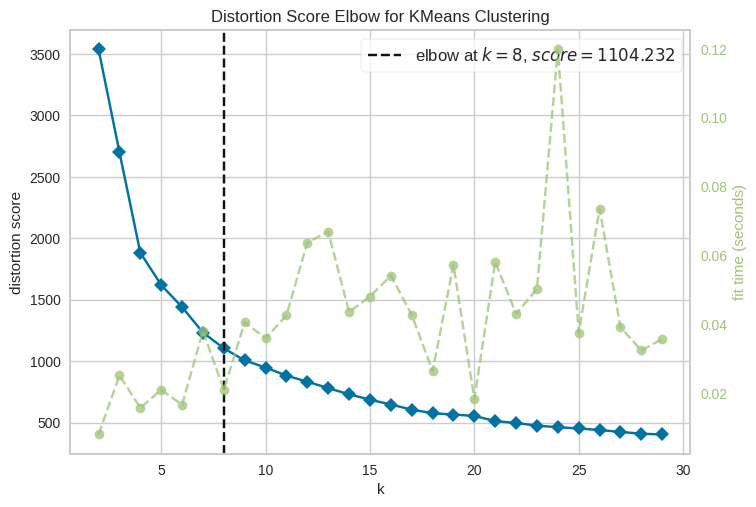

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(max_iter=100, n_clusters=29, random_state=0),
                 k=(2, 30))

In [102]:
cl_model2=deepcopy(cl_model) # ojo

kelbow_visualizer(cl_model2, kmeans_rfm_data_norm, k=(2,30), locate_elbow=True)

**Figura 17:** Determinación del número óptimo de Clústers para Segmentación de Clientes

Vemos que la curva empieza a estabilizarse a partir de 8 clústers **(Lo dejaremos como una posible optimización)**

## 5.5) Análisis el modelo final: Gráfico de coordenadas 📉

Le agregamos a que cluster pertence cada cliente

In [103]:
# Añadimos a que cluster pertenece cada cliente
cluster_var='Cluster' # definan nombre de var de clustering

# Asignar los resultados de la predicción a una nueva columna
kmeans_rfm_data[cluster_var] = cl_model.fit_predict(kmeans_rfm_data_norm) # ojo aca! el predict es de los datos normalizados

In [104]:
x_data_cl=kmeans_rfm_data.copy() # hagan copia de los datos de TR para no perderlos antes de normalizar

In [105]:
x_data_cl.head()

,Recency,Frequency,Monetary,Cluster
0,58,25,1617,4
1,38,6,27,3
2,26,21,776,1
3,26,8,53,3
4,94,19,422,2


In [106]:
from funpymodeling.model_validation import coord_plot

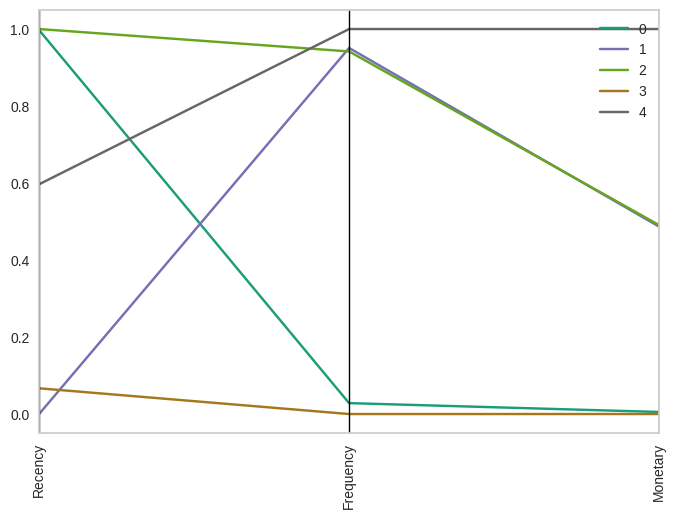

In [107]:
d_orig, d_transf = coord_plot(x_data_cl, cluster_var)

**Figura 18:** Gráfico de Coordenadas por clúster de K-Means

In [108]:
# Datos originales
d_orig

,Recency,Frequency,Monetary,Cluster
0,73.831843,8.452594,116.280859,0
1,20.050481,21.240385,889.007212,1
2,73.981567,21.115207,895.341014,2
3,23.652908,8.060038,107.686679,3
4,52.233333,21.922222,1712.866667,4


In [109]:
# Datos normalizados
d_transf

,Recency,Frequency,Monetary,Cluster
0,0.997224,0.028319,0.005354,0
1,0.000000,0.950813,0.486749,1
2,1.000000,0.941783,0.490695,2
3,0.066797,0.000000,0.000000,3
4,0.596740,1.000000,1.000000,4


Graficamos con el mismo formato que el resto de gráficos

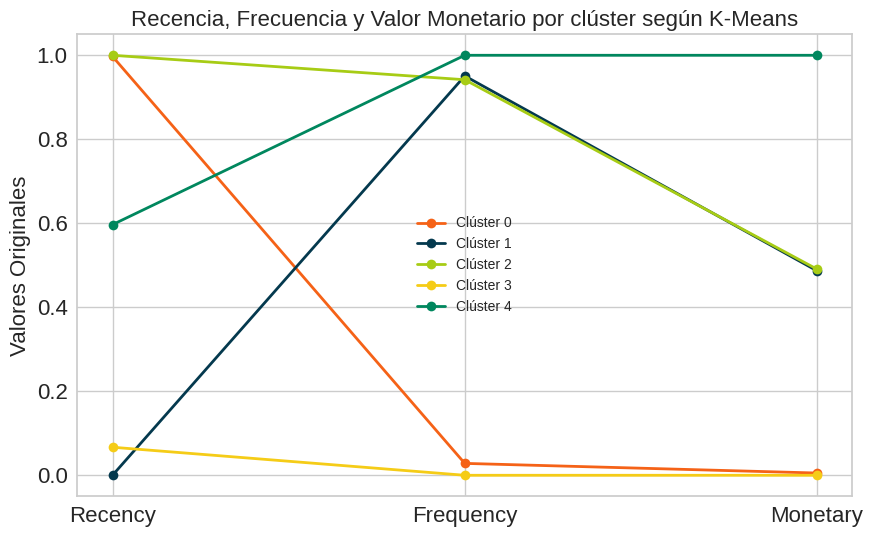

In [110]:
# Seleccionamos las columnas
d_transf_selected = d_transf[['Recency', 'Frequency', 'Monetary']]

my_colors = ['#f56217','#04394e', '#a7cc15', '#f5cc17', '#00875e']  # Los reordenamos para que coincidan

# Establecer la figura y el tamaño
plt.figure(figsize=[10,6])

# Graficamos los valores
for i in range(d_transf_selected.shape[0]):  # Iteramos sobre las filas (cada clúster)
    plt.plot(d_transf_selected.columns, d_transf_selected.iloc[i], linewidth=2, marker='o', color=my_colors[i])

# Añadimos leyenda con los nombres de los clústeres
plt.legend([f'Clúster {i}' for i in range(d_transf_selected.shape[0])], fontsize=10)

# Añadimos etiquetas y título
plt.ylabel("Valores Originales", fontsize=16)
plt.title("Recencia, Frecuencia y Valor Monetario por clúster según K-Means", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Añadimos la cuadrícula
plt.grid(True)

# Guardar el gráfico en un archivo
#plt.savefig(path_images+'fig_19.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()


**Figura 19:** Gráfico de Coordenadas por clúster de K-Means

In [111]:
# Realizar un análisis descriptivo por cluster
cluster_summary = kmeans_rfm_data.groupby('Cluster').agg({
    'Recency': ['mean', 'std', 'min', 'max'],
    'Frequency': ['mean', 'std', 'min', 'max'],
    'Monetary': ['mean', 'std', 'min', 'max'],
})

print(cluster_summary.round(3))

        Recency                 Frequency                 Monetary           \
           mean     std min max      mean    std min max      mean      std   
Cluster                                                                       
0        73.832  15.108  48  99     8.453  3.554   0  17   116.281  108.694   
1        20.050  13.513   0  47    21.240  4.383  11  35   889.007  359.282   
2        73.982  15.018  48  99    21.115  4.354  10  39   895.341  324.588   
3        23.653  14.126   0  49     8.060  3.325   0  17   107.687  103.412   
4        52.233  22.465   2  98    21.922  4.738  11  44  1712.867  300.659   

                     
          min   max  
Cluster              
0           5   801  
1         275  1901  
2         264  1677  
3           6   711  
4        1135  2525  


#### **Conclusiones**

En base a un análisis del gráfico y el análisis descriptivo, podriamos llegar a una segmentación similar a la desarrollada anteriormente.

* Cluster 0: Clientes con recency alta, frecuencia baja y bajo gasto -> Clientes inactivos -> **Clase Inferior**

* Cluster 1: Clientes recientes, frecuentes y de alto gasto -> Clientes frecuentes y de alto valor -> **Clase Top**

* Cluster 2: Clientes con gasto alto y frecuencia alta, pero recency alta -> Clientes de Alto Valor pero en Riesgo -> **Clase Medium**

* Cluster 3: Clientes recientes, pero de baja frecuencia y bajo gasto -> Clientes Ocasionales o de Bajo Compromiso -> **Clase Low**

* Cluster 4: Clientes con gasto alto y frecuencia alta, pero recency intermedia -> Clientes Premium y Leales -> **Clase High**


In [112]:
# Añadir nombres para cada cluster
cluster_names = {
    0: 'Inferior',  # Aquí puedes asignar nombres más representativos
    1: 'Top',
    2: 'Medium',
    3: 'Low',
    4: 'High'
}

# Crear una nueva columna 'Group' que contiene los nombres del grupo correspondiente
kmeans_rfm_data['group'] = kmeans_rfm_data['Cluster'].map(cluster_names)

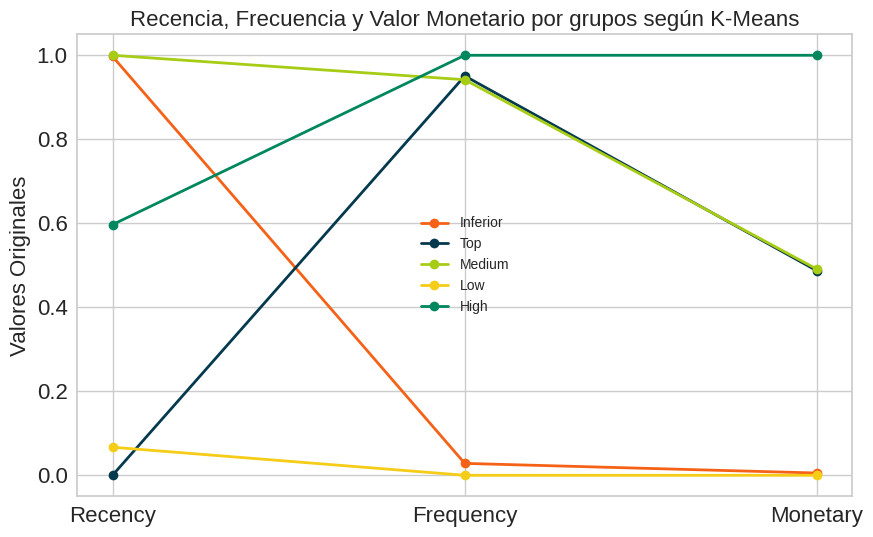

In [113]:
# Seleccionamos las columnas
d_transf_selected = d_transf[['Recency', 'Frequency', 'Monetary']]

my_colors = ['#f56217','#04394e', '#a7cc15', '#f5cc17', '#00875e']  # Los reordenamos para que coincidan

# Establecer la figura y el tamaño
plt.figure(figsize=[10,6])

# Graficamos los valores
for i in range(d_transf_selected.shape[0]):  # Iteramos sobre las filas (cada clúster)
    plt.plot(d_transf_selected.columns, d_transf_selected.iloc[i], linewidth=2, marker='o', color=my_colors[i])

# Añadimos leyenda con los nombres de los clústeres
plt.legend([cluster_names[i] for i in range(d_transf['Cluster'].nunique())], fontsize=10)

# Añadimos etiquetas y título
plt.ylabel("Valores Originales", fontsize=16)
plt.title("Recencia, Frecuencia y Valor Monetario por grupos según K-Means", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Añadimos la cuadrícula
plt.grid(True)

# Guardar el gráfico en un archivo
plt.savefig(path_images+'fig_20.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

**Figura 20:** Gráfico de Coordenadas por grupos con K-Means

## 5.6) Distribución de Clientes 📊

Añadimos el ID que le corresponde a cada información

In [114]:
# Añadir el ID de cada cliente
kmeans_rfm_data["ID"] = data.ID

Calculamos la distribución de clientes por grupo

In [115]:
# Contar cuántos clientes únicos hay por categoría de clúster
unique_client_counts = kmeans_rfm_data.groupby('group', observed=False)['ID'].nunique()

# Calcular el porcentaje que representa cada categoría (en términos de clientes únicos)
total_unique_clients = data_rfm['ID'].nunique()
unique_client_percentages = (unique_client_counts / total_unique_clients) * 100

# Crear un DataFrame con los resultados
kmeans_rfm_client_summary = pd.DataFrame({
    'customers': unique_client_counts,
    'perc_group': unique_client_percentages
})

# Mostrar los resultados
print(kmeans_rfm_client_summary.round(2))

          customers  perc_group
group                          
High            270       12.21
Inferior        559       25.27
Low             533       24.10
Medium          434       19.62
Top             416       18.81


Si comparamos respecto a la segmentación anterior, el Grupo de mejores clientes (Top + High + Medium) tenia 1.140 clientes, con esta nueva segmentación tenemos 1.120 clientes, lo cuál es muy similar. Sin embargo la cantidad de clientes por grupos no es la misma en su totalidad.

<ipython-input-116-044729ae4d7c>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.bar(x1[i],y1[i],width =-0.4,zorder=3,color=my_colors[i],align='center')
<ipython-input-116-044729ae4d7c>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(x1[i], y1[i],str(np.round(y1[i],decimals=1))+'%',fontsize =15,ha= 'center',color=my_colors[i],rotation='horizontal')


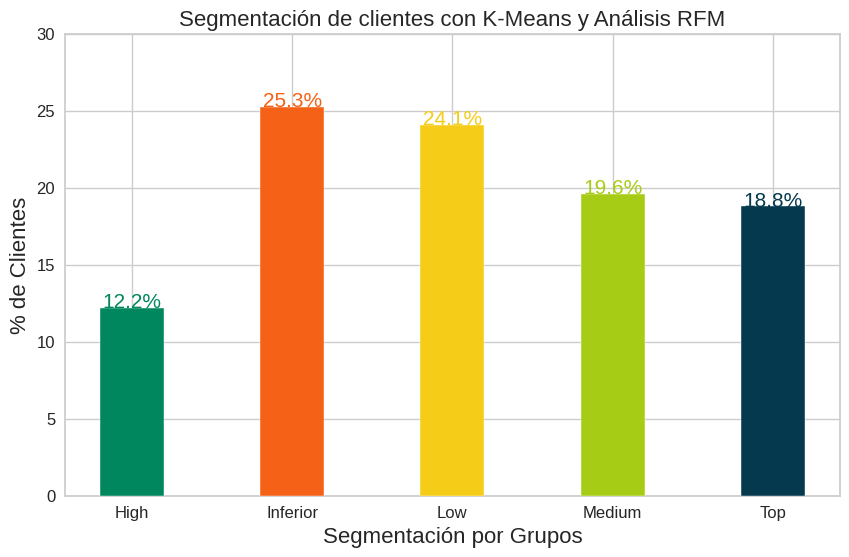

In [116]:
#Graficar el porcentaje de clientes en cada grupo
fig, ax = plt.subplots(figsize = (10,6))

x1 = kmeans_rfm_client_summary.index
y1 = kmeans_rfm_client_summary.perc_group

my_colors=['#00875e','#f56217','#f5cc17','#a7cc15','#04394e']

for i in range(len(y1)):
    ax.bar(x1[i],y1[i],width =-0.4,zorder=3,color=my_colors[i],align='center')
    ax.text(x1[i], y1[i],str(np.round(y1[i],decimals=1))+'%',fontsize =15,ha= 'center',color=my_colors[i],rotation='horizontal')



# organizing the labels and axis
ax.set_xlabel('Segmentación por Grupos',fontsize=16)
ax.set_ylabel("% de Clientes",fontsize=16)
ax.set_title("Segmentación de clientes con K-Means y Análisis RFM",fontsize=16)

ax.set_ylim(0,30)
plt.xticks(fontsize = 12,rotation='horizontal',ha='center')
plt.yticks(fontsize = 12)

ax.grid(zorder=0)

# Guardar el gráfico en un archivo
plt.savefig(path_images+'fig_21.png', dpi=300, bbox_inches='tight')

**Figura 21:** % de clientes en cada grupo por segmentación con K-Means y Análisis RFM

### ⭐**Bonus:** Por si se exporta como CSV

In [117]:
kmeans_rfm_data.head()

,Recency,Frequency,Monetary,Cluster,group,ID
0,58,25,1617,4,High,5524
1,38,6,27,3,Low,2174
2,26,21,776,1,Top,4141
3,26,8,53,3,Low,6182
4,94,19,422,2,Medium,5324


In [118]:
# Exportar a CSV
#kmeans_rfm_data.to_csv(path_files+'kmeans_rfm_data.csv', index=False)

## 5.7)  Mejores Clientes con K-Means 👑

In [119]:
# Añadir la participación en campañas (Lo necesitamos para los calculos)
kmeans_rfm_data["AcceptedCmpOverall"] = data.AcceptedCmpOverall

In [120]:
# Filtrar las filas donde 'group' es 'High', 'Top' o 'Medium'
best_kmeans = kmeans_rfm_data[kmeans_rfm_data['group'].isin(['High', 'Top', 'Medium'])]

In [121]:
best_kmeans.shape

(1120, 7)

In [122]:
#Comparar los clientes de todo el dataset versus solo los mejores clientes
Comparing = pd.DataFrame()

# Clientes unicos
Comparing['Unique_Customers'] = [kmeans_rfm_data.ID.nunique(), best_kmeans.ID.nunique(), 100*(kmeans_rfm_data.ID.nunique()-best_kmeans.ID.nunique())/kmeans_rfm_data.ID.nunique()] # combinar los dataframes

# Productos Vendidos
Comparing['Gadgets_sold'] = [kmeans_rfm_data.AcceptedCmpOverall.sum(),best_kmeans.AcceptedCmpOverall.sum(),100*(kmeans_rfm_data.AcceptedCmpOverall.sum()-best_kmeans.AcceptedCmpOverall.sum())/kmeans_rfm_data.AcceptedCmpOverall.sum()] # combinar los dataframes

Comparing.index = ['Todos los Clientes','Mejores Clientes', 'Diferencia(%)']

In [123]:
Comparing.round(2)

,Unique_Customers,Gadgets_sold
Todos los Clientes,2212.00,660.0
Mejores Clientes,1120.00,563.0
Diferencia(%),49.37,14.7


**Conclusiones:**
* Utilizando esta segmentación de clientes sencilla, si desde la Campaña 1 consideramos contactar solo al grupo Top, High y Medium que representan a nuestros clientes más activos y leales, reduciríamos los costos de contacto en un 49,37%.
* A pesar de contactar a menos clientes, los ingresos por los productos vendidos disminuirían en solo un 14,70%. Es mucho más bajo que la reducción en la cantidad de clientes.

### ⭐**Bonus:** Por si se exporta como CSV este grupo

In [124]:
# Quitamos las columnas que no queremos exportar
best_group_kmeans=best_kmeans.drop([ 'AcceptedCmpOverall'], axis = 1)

In [125]:
# Mostramos lo que se va a exportar
best_group_kmeans.head()

,Recency,Frequency,Monetary,Cluster,group,ID
0,58,25,1617,4,High,5524
2,26,21,776,1,Top,4141
4,94,19,422,2,Medium,5324
5,16,22,716,1,Top,7446
6,34,21,590,1,Top,965


In [126]:
# Exportar como CSV
#best_group_kmeans.to_csv('best_group_kmeans.csv', index=False)  # 'index=False' para no incluir la columna de índices en el archivo

### 5.7.1) Oportunidades de mejora
* De antemano en la última campaña, sabemos que el costo total de la campaña de muestra fue de 6.720MU y los ingresos generados por los clientes que aceptaron la oferta fueron de 3.674MU. Lo que dio un **ROI del -45%**

Si nos concentráramos únicamente en nuestros mejores clientes:

* Al contactar una menor cantidad de clientes tendriamos un costo total de campaña 49,37% menor que si contactaramos todos los clientes, de tal manera que el costo proyectado sería 3.402,34UM
* Los ingresos esperadas considerando la diferencia de reducir la cantidad de clientes es una reducción del 14,7% en las ventas, de tal manera que las ventas proyectadas serian 3.133,92UM.
* Luego **se obtendría un ROI del -7,89%**

> **Aumentaríamos el ROI de la campaña de un -45% a un -7,89%.** Todavía no es la situación ideal, pero ya está mucho mejor.


# 6) **Extra:** Segmentación basada en la Compras por categoría de productos  | Clustering con K-Means 🍇

## 6.1) Crear el dataset 📥

Compra por categoría de producto

In [127]:
# Crear Dataframe
kmeans_purchase_data=pd.DataFrame()

# Seleccionamos las variables de gasto en diferentes categorías de productos
kmeans_purchase_data = data[['MntWines', 'MntMeatProducts', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

In [128]:
kmeans_purchase_data.head()

,MntWines,MntMeatProducts,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,546,88,172,88,88
1,11,6,1,2,1,6
2,426,127,49,111,21,42
3,11,20,4,10,3,5
4,173,118,43,46,27,15


## 6.2) Normalizar los datos 📋

In [129]:
# Normalizamos los datos
std_scaler = StandardScaler()
std_scaler.fit(kmeans_purchase_data)
kmeans_purchase_data_norm=std_scaler.transform(kmeans_purchase_data)

In [130]:
# A ver que hizo!?
pd.DataFrame(kmeans_purchase_data_norm).describe()

,0,1,2,3,4,5
count,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03
mean,4.898633e-17,3.212219e-18,1.043971e-17,-1.204582e-17,3.212219e-18,9.636656e-18
std,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00
min,-9.052351e-01,-7.449911e-01,-6.626279e-01,-6.875269e-01,-6.583604e-01,-8.497071e-01
25%,-8.340705e-01,-6.736275e-01,-6.122946e-01,-6.327421e-01,-6.340186e-01,-6.756101e-01
50%,-3.848445e-01,-4.416956e-01,-4.612945e-01,-4.683875e-01,-4.636265e-01,-3.757762e-01
75%,5.921851e-01,2.908968e-01,1.678727e-01,2.255541e-01,1.449170e-01,2.335637e-01
max,3.521791e+00,6.948902e+00,4.345543e+00,4.042233e+00,5.719175e+00,5.359756e+00


## 6.3) Crear un Modelo 💻

Asignamos un valor inicial de la cantidad de cluster

In [131]:
cl_model = KMeans(
    n_clusters=6,     # el parámetro importante!
    init='k-means++', # k-means++ acelera la convergencia, respecto de random
    max_iter=100,
    random_state=0,
    n_init='auto'     # Para evitar warnings más adelante
)

cl_model.fit(kmeans_purchase_data_norm)

KMeans(max_iter=100, n_clusters=6, random_state=0)

In [132]:
pred_cl = cl_model.predict(kmeans_purchase_data_norm)

# Número de cluster:
pred_cl

array([3, 0, 4, ..., 4, 4, 0], dtype=int32)

## 6.4) ⭐**Bonus:** Determinar la cantidad de cluster óptimo

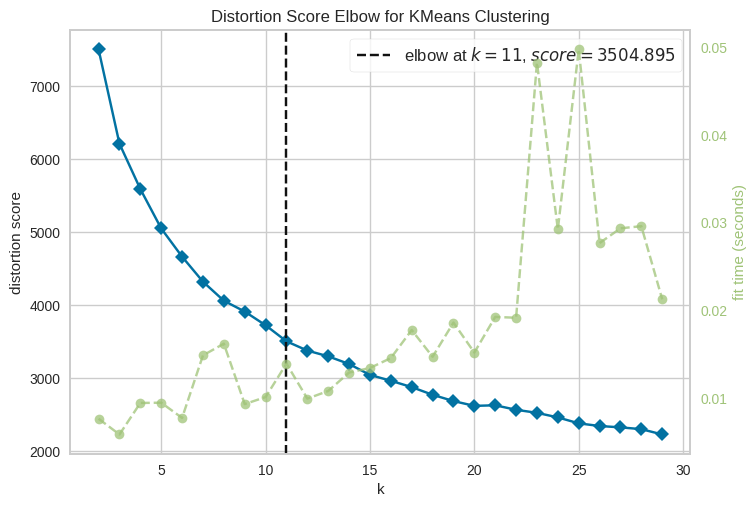

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(max_iter=100, n_clusters=29, random_state=0),
                 k=(2, 30))

In [133]:
cl_model2=deepcopy(cl_model) # ojo

kelbow_visualizer(cl_model2,kmeans_purchase_data_norm, k=(2,30), locate_elbow=True)

**Figura 22:** Determinación del número óptimo de Clusters para segmentación por categorías de compras de productos

Vemos que la curva empieza a estabilizarse a partir de 11 cluster **(Lo dejaremos como una posible optimización)**

## 6.5) Análisis el modelo final: Gráfico de coordenadas 📉

In [134]:
cluster_var='group' # definan nombre de var de clustering
x_data_cl=kmeans_purchase_data.copy() # hagan copia de los datos de TR para no perderlos antes de normalizar
x_data_cl[cluster_var]=cl_model.predict(kmeans_purchase_data_norm) # ojo aca! el predict es de los datos normalizados

In [135]:
x_data_cl.head()

,MntWines,MntMeatProducts,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds,group
0,635,546,88,172,88,88,3
1,11,6,1,2,1,6,0
2,426,127,49,111,21,42,4
3,11,20,4,10,3,5,0
4,173,118,43,46,27,15,0


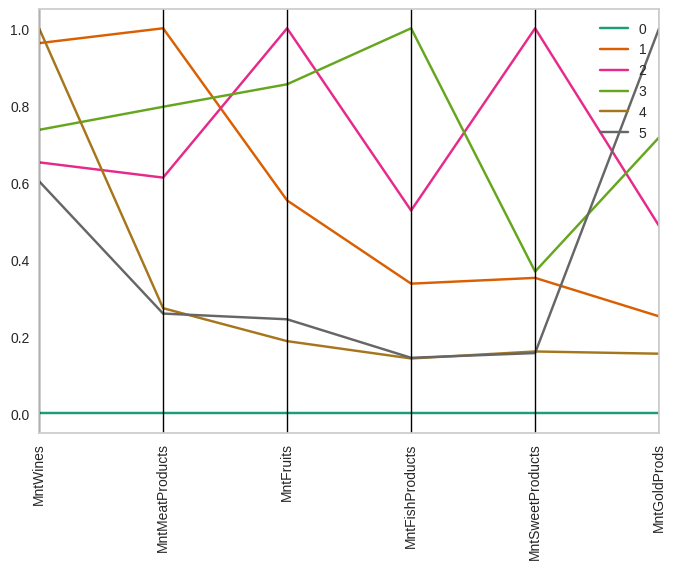

In [136]:
d_orig, d_transf = coord_plot(x_data_cl, cluster_var)

**Figura 22:** Gráfico de Coordenadas por clúster de K-Means

In [137]:
# Datos originales
d_orig

,MntWines,MntMeatProducts,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds,group
0,76.247126,32.376847,6.108374,8.695402,6.107553,16.700328,0
1,675.215385,586.928205,55.158974,69.661538,48.476923,49.564103,1
2,482.306122,371.831633,94.821429,104.071429,126.576531,80.214286,2
3,534.930435,473.860870,81.921739,189.773913,50.452174,110.269565,3
4,699.270000,183.743333,22.730000,34.470000,25.446667,36.903333,4
5,451.755319,176.000000,27.765957,34.792553,24.946809,147.255319,5


In [138]:
# Datos normalizados
d_transf

,MntWines,MntMeatProducts,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds,group
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.961390,1.000000,0.552913,0.336683,0.351704,0.251724,1
2,0.651756,0.612125,1.000000,0.526711,1.000000,0.486492,2
3,0.736222,0.796110,0.854591,1.000000,0.368100,0.716704,3
4,1.000000,0.272953,0.187364,0.142339,0.160532,0.154747,4
5,0.602720,0.258990,0.244131,0.144121,0.156383,1.000000,5


Graficamos con el mismo formato que el resto de gráficos

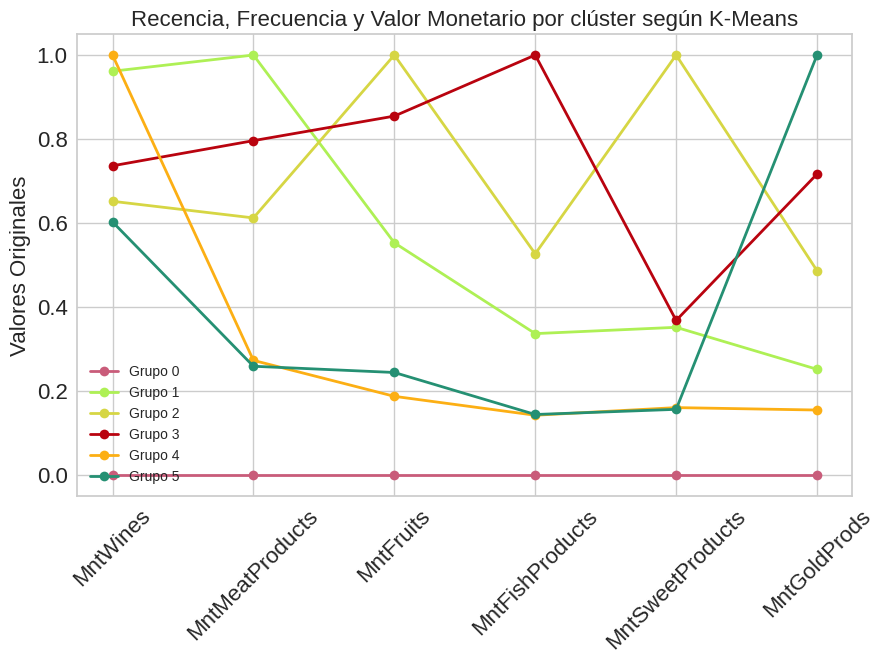

In [139]:
# Seleccionamos las columnas
d_transf_selected = d_transf[['MntWines',	'MntMeatProducts',	'MntFruits',	'MntFishProducts',	'MntSweetProducts',	'MntGoldProds']]

my_colors = ['#c95c7a','#aef055', '#d6d644','#b9030f', '#fcaf14', '#259073']  # Los reordenamos para que coincidan

# Establecer la figura y el tamaño
plt.figure(figsize=[10,6])

# Graficamos los valores
for i in range(d_transf_selected.shape[0]):  # Iteramos sobre las filas (cada clúster)
    plt.plot(d_transf_selected.columns, d_transf_selected.iloc[i], linewidth=2, marker='o', color=my_colors[i])

# Añadimos leyenda con los nombres de los clústeres
plt.legend([f'Grupo {i}' for i in range(d_transf_selected.shape[0])], fontsize=10)

# Añadimos etiquetas y título
plt.ylabel("Valores Originales", fontsize=16)
plt.title("Recencia, Frecuencia y Valor Monetario por clúster según K-Means", fontsize=16)
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)

# Añadimos la cuadrícula
plt.grid(True)

# Guardar el gráfico en un archivo
#plt.savefig(path_images+'fig_23.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()


**Figura 23:** Gráfico de Coordenadas por clúster de compras con K-Means

In [140]:
# Realizar un análisis descriptivo por cluster
cluster_summary = x_data_cl.groupby('group').agg({
    'MntWines': ['mean', 'std', 'min', 'max'],
    'MntMeatProducts': ['mean', 'std', 'min', 'max'],
    'MntFruits': ['mean', 'std', 'min', 'max'],
    'MntFishProducts': ['mean', 'std', 'min', 'max'],
    'MntSweetProducts': ['mean', 'std', 'min', 'max'],
    'MntGoldProds': ['mean', 'std', 'min', 'max'],
})

print(cluster_summary)

         MntWines                        MntMeatProducts                   \
             mean         std  min   max            mean         std  min   
group                                                                       
0       76.247126  101.101699    0   516       32.376847   36.880317    0   
1      675.215385  314.508313    1  1493      586.928205  240.685993  168   
2      482.306122  260.645408    6  1259      371.831633  222.246680    3   
3      534.930435  285.575219   33  1315      473.860870  240.609274   64   
4      699.270000  300.403626  157  1492      183.743333  100.704064   21   
5      451.755319  301.859679    7  1486      176.000000  135.272472   12   

             MntFruits                     MntFishProducts                  \
        max       mean        std min  max            mean        std  min   
group                                                                        
0       288   6.108374   9.781495   0  103        8.695402  13.809717   

## 6.6) **Conclusiones**

En base a un análisis del gráfico, podriamos llegar a una segmentación similar a la desarrollada anteriormente.

* Cluster 0 = Grupo de clientes regulares/bajo que gastan principalmente en vino y carnes
* Cluster 1 = Grupo de clientes de alto gasto principalmente en vino y carnes
* Cluster 2 = Grupo de clientes de alto gasto en frutas, pescados y dulces
* Cluster 3 = Grupo de clientes regular que gastan principalmente en vino, pescados, carnes y productos Gold.
* Cluster 4 = Grupo de clientes de alto gasto principalmente en vino y regular en Carnes
* Cluster 5 = Grupo de clientes de alto gasto principalmente en vino y productos  Gold.

Calculamos la distribución de clientes por grupo

In [141]:
kmeans_purchase_data = kmeans_purchase_data.copy()

# Añadimos el grupo de clústeres
kmeans_purchase_data['group'] = cl_model.predict(kmeans_purchase_data_norm)

# Añadir el ID de cada cliente
kmeans_purchase_data['ID'] = data['ID']

In [142]:
# Contar cuántos clientes únicos hay por categoría de clúster
unique_client_counts = kmeans_purchase_data.groupby('group', observed=False)['ID'].nunique()

# Calcular el porcentaje que representa cada categoría (en términos de clientes únicos)
total_unique_clients = kmeans_purchase_data['ID'].nunique()
unique_client_percentages = (unique_client_counts / total_unique_clients) * 100

# Crear un DataFrame con los resultados
kmeans_purchase_client_summary = pd.DataFrame({
    'customers': unique_client_counts,
    'perc_group': unique_client_percentages
})

# Mostrar los resultados
print(kmeans_purchase_client_summary)

       customers  perc_group
group                       
0           1218   55.063291
1            195    8.815552
2            196    8.860759
3            115    5.198915
4            300   13.562387
5            188    8.499096


### ⭐**Bonus:** Por si se exporta como CSV

In [143]:
kmeans_purchase_data.head()

,MntWines,MntMeatProducts,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds,group,ID
0,635,546,88,172,88,88,3,5524
1,11,6,1,2,1,6,0,2174
2,426,127,49,111,21,42,4,4141
3,11,20,4,10,3,5,0,6182
4,173,118,43,46,27,15,0,5324


In [144]:
# Exportar a CSV
#kmeans_purchase_data.to_csv(path_files+'kmeans_purchase_data.csv', index=False)

# 7) Modelo Predictivo 🎯

Tenemos un problema de clasificación de dos clases (aceptar o no una oferta de campaña), por lo que haremos un modelo para predecir la posibilidad de que el cliente acepte o no la oferta en la próxima campaña.

## 7.1) Cargar el dataset 📥

In [169]:
data_modelo = data.copy()
data_modelo.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital_ID,Education_ID
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,67,4463,1617,1529,0,0,2
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,70,3913,27,21,0,0,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,59,4112,776,734,0,1,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,40,3939,53,48,0,1,2
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,43,3961,422,407,0,2,4


In [170]:
# Añadimos la columna del puntaje RFM calculado previamente
#data_modelo['rfm_score'] = data_rfm.rfm_score # Perjudica nuestro modelo

In [171]:
# Guardar los valores de 'ID'
ids_originales = data_modelo['ID'].values  # Suponiendo que 'ID' es la columna en 'data_modelo'

In [172]:
# Quitamos las columnas que ya han sido calculadas o no necesitamos
data_modelo=data_modelo.drop(['Year_Birth', 'Education','Marital_Status','Dt_Customer', 'ID'], axis = 1)
data_modelo.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital_ID,Education_ID
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,67,4463,1617,1529,0,0,2
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,70,3913,27,21,0,0,2
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,59,4112,776,734,0,1,2
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,40,3939,53,48,0,1,2
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,43,3961,422,407,0,2,4


## 7.2) Selección de variables 📋

In [173]:
# Clasificamos la correlación de las variables con nuestro objetivo "Response"
data_cor=abs(data_modelo.corr()['Response']).sort_values(ascending=False)
#data_cor=data_cor.to_frame()
data_cor

,Response
Response,1.000000
AcceptedCmpOverall,0.427297
AcceptedCmp5,0.324891
AcceptedCmp1,0.297212
MntTotal,0.264443
MntRegularProds,0.263522
AcceptedCmp3,0.253849
MntWines,0.246320
MntMeatProducts,0.237966
NumCatalogPurchases,0.219912


In [174]:
# Filtramos solo las variables cuya correlación con 'Response' representativas
independent_variables = data_cor.index[1:21].values

In [175]:
print(independent_variables)

['AcceptedCmpOverall' 'AcceptedCmp5' 'AcceptedCmp1' 'MntTotal'
 'MntRegularProds' 'AcceptedCmp3' 'MntWines' 'MntMeatProducts'
 'NumCatalogPurchases' 'Recency' 'Customer_Days' 'AcceptedCmp4'
 'AcceptedCmp2' 'Income' 'Teenhome' 'NumWebPurchases' 'MntGoldProds'
 'MntFruits' 'MntSweetProducts' 'MntFishProducts']


## 7.3) Crear Modelo Predictivo 💻

### Crear los dataset

In [176]:
# Generamos los dataset

# Variables Independientes
X = data_modelo[independent_variables].values

# Variables Dependientes
Y = data_modelo['Response'].values

In [177]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [178]:
# Tamaño del dataset de entrenamiento
print(x_train.shape)
print(y_train.shape)

# Tamaño del dataset de prueba
print(x_test.shape)
print(y_test.shape)

(1548, 20)
(1548,)
(664, 20)
(664,)


### Definir los mejores hiperparámetros

Definir los valores posibles que serán probados para cada uno de los hiperparámetros del modelo

In [179]:
# Definición del espacio de búsqueda para encontrar los mejores hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200], # Cantidad de "Jueces" que determinan la decision
    'criterion' :['gini'],
    'min_samples_split': [5, 10, 20] # Para reducir overfitting, es el 10% de n_estimators (Experimental-Práctico)
    #'min_samples_leaf': [2, 5, 10] # La mitad del min_samples_split (int) (Experimental-Práctico)
}

### Crear el modelo predictivo

K-Folds y Random Forest



---
El método **K-folds** consiste en dividir el conjunto de datos en k subconjuntos (o "pliegues"). El modelo se entrena k veces, cada vez usando k-1 pliegues para entrenamiento y el pliegue restante para prueba. El rendimiento final se obtiene promediando los resultados de todas las iteraciones, lo que ayuda a obtener una evaluación más robusta y confiable del modelo.

Sirve para cuando quieres evitar sobreajustar (overfitting) el modelo, asegurándote de que se generalice bien a nuevos datos. También es útil cuando tienes un conjunto de datos limitado y no puedes permitirte usar un conjunto de datos de prueba separado.

---


In [180]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Entrenamiento de modelos Random Forest con K-Fold de 5
# Realizar la búsqueda de hiperparámetros con validación cruzada (cv=5)
rf_models = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5, verbose=1)



---
**Random Forest** es un clasificador basado en un "bosque" de varios árboles de decisión para hacer predicciones, que combina múltiples árboles de decisión para mejorar la precisión y robustez del modelo.

**Grid Search** permite encontrar la mejor configuración de hiperparámetros para el modelo probando todas las combinaciones posibles y evaluando cuál funciona mejor, lo que mejora el rendimiento del modelo sin tener que hacerlo manualmente.

---



Entrenar el modelo

In [181]:
# Entrenar el modelo
rf_models.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

Selección de modelo e hiperparametros

In [182]:
# Mejores hiperametros
print("Mejores hiperparámetros:", rf_models.best_params_)

Mejores hiperparámetros: {'criterion': 'gini', 'min_samples_split': 5, 'n_estimators': 50}


In [183]:
# Obtener el mejor modelo entrenado con los mejores hiperparámetros
best_model = rf_models.best_estimator_

## 7.4) Precisión del modelo ✅

### 7.4.1) Accuracy y F1 Score

In [184]:
# Obtener las predicciones
predictions = best_model.predict(x_test)



---

El **accuracy** es la proporción de predicciones correctas realizadas por un modelo sobre el total de predicciones.

---



In [222]:
# Precisión del modelo
print("Accuracy:",metrics.accuracy_score(predictions, y_test))

Accuracy: 0.8810240963855421




---

El **F1 score** es una métrica que ayuda a evaluar el rendimiento de un modelo de clasificación, combinando de manera balanceada la precisión y el recall(Tasa de Verdaderos Positivos). Es útil especialmente cuando las clases están desbalanceadas o cuando se necesita un buen equilibrio entre detectar correctamente los casos positivos y evitar clasificar incorrectamente los casos negativos.

---



In [186]:
# F1 Score del modelo
print("F1 Score:",metrics.f1_score(predictions, y_test))

F1 Score: 0.46258503401360546


###  7.4.2) Matriz de Confusión



---

La **matriz de confusión** muestra cómo se clasificaron realmente las instancias frente a las predicciones del modelo. Permite ver de manera clara los tipos de errores que el modelo está cometiendo

---



In [187]:
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

In [206]:
# Crear degradado de acuerdo a los colores de la marca
import matplotlib.colors as mcolors
colors = ['#FFF2F2', '#570015']  # Desde un tono claro a un rojo más oscuro
cmap = mcolors.LinearSegmentedColormap.from_list("RedGradient", colors)

#### Con los dataset de Test

* En forma númerica

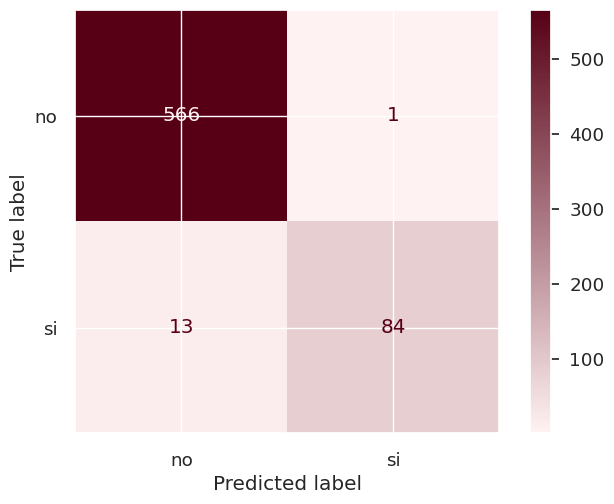

In [216]:
sns.set(font_scale=1.2)  # Ajuste tamaño de letra (var global)

# Mostrar la matriz
ConfusionMatrixDisplay.from_estimator(
    best_model, x_test, y_test,
    display_labels=['no', 'si'],
    cmap=cmap,  # Aplicar el degradado
)

# Guardar el gráfico
#plt.savefig(path_images+'fig_24.png', format='png', dpi=300)

**Figura 24:** Matriz de Confusión de las predicciones númerico para el dataset de test

* Relativo

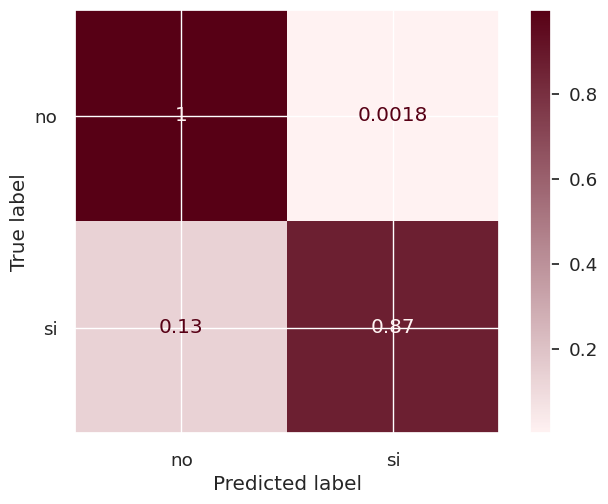

In [220]:
sns.set(font_scale=1.2) #  Ajuste tamaño de letra (var global)

ConfusionMatrixDisplay.from_estimator(
    best_model,x_test,y_test,
    display_labels=['no','si'],
    cmap=cmap,
    normalize='true',
    )


# Guardar el gráfico
plt.savefig(path_images+'fig_25.png', format='png', dpi=300)

**Figura 25:** Matriz de Confusión de las predicciones relativo para el dataset de test

#### Con todo el conjunto de datos del dataset

* En forma númerica

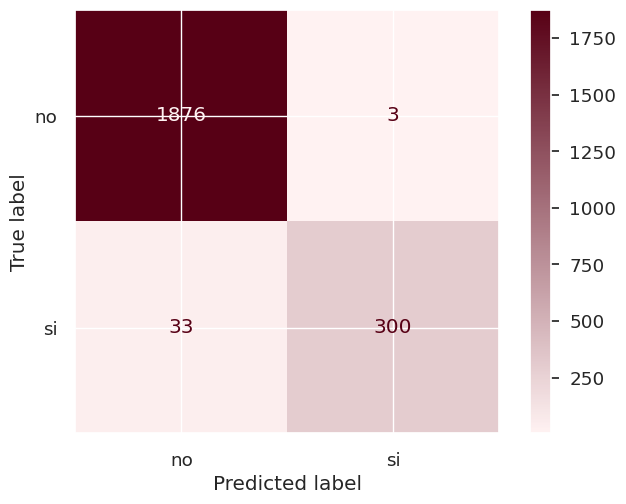

In [407]:
sns.set(font_scale=1.2) #  Ajuste tamaño de letra (var global)

ConfusionMatrixDisplay.from_estimator(
    best_model,X,Y,
    display_labels=['no','si'],
    cmap=cmap,
    )

# Guardar el gráfico
#plt.savefig(path_images+'fig_26.png', format='png', dpi=300)

**Figura 26:** Matriz de Confusión de las predicciones númerico para el dataset de test

* Relativo

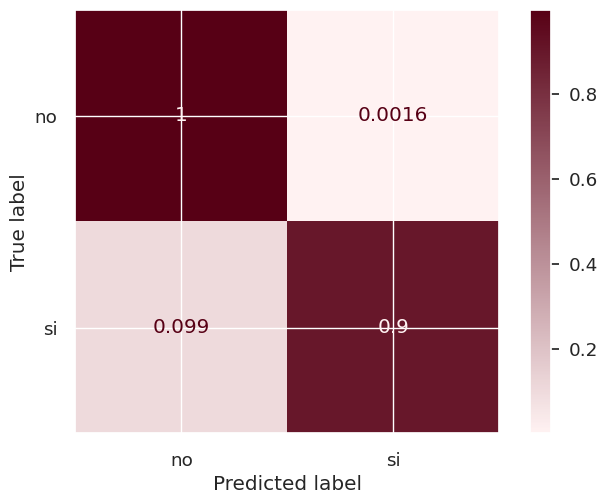

In [406]:
sns.set(font_scale=1.2) #  Ajuste tamaño de letra (var global)

ConfusionMatrixDisplay.from_estimator(
    best_model,X,Y,
    display_labels=['no','si'],
    cmap=cmap,
    normalize='true',
    )

# Guardar el gráfico
#plt.savefig(path_images+'fig_27.png', format='png', dpi=300)

**Figura 27:** Matriz de Confusión de las predicciones relativo para el dataset completo

#### **Resultados**

Como podemos ver, nuestro modelo predijo correctamente el 100% de los clientes que no aceptaron la oferta y el 91% de los clientes que aceptaron la oferta en la última campaña.

* El 91% de los clientes que realmente compraron la oferta fueron correctamente identificados por el modelo (verdaderos positivos).

* El modelo comete un 9,3% de falsos negativos, es decir, predice que algunos compradores no comprarán, pero si terminaron comprando. Este es un error relativamente bajo.

* El 0,32% de los no compradores fueron erróneamente clasificados como compradores. Este error puede ser costoso porque implica contactar a clientes que no comprarán.

* El 100% de los clientes que no compraron fueron correctamente clasificados como no compradores, lo que evita desperdiciar recursos.

## 7.5) Curva ROC 📈



---
La **curva ROC** representa gráficamente la relación entre dos métricas clave: tasa de verdaderos positivos (TPR) y tasa de falsos positivos (FPR), a medida que se varía el umbral de decisión para clasificar una observación como positiva o negativa.

* Un AUC de 1 indica un modelo perfecto.
* Un AUC de 0.5 indica un modelo que no tiene poder discriminativo, es decir, un modelo aleatorio.
* Cuanto mayor sea el valor de AUC, mejor será el modelo.
---



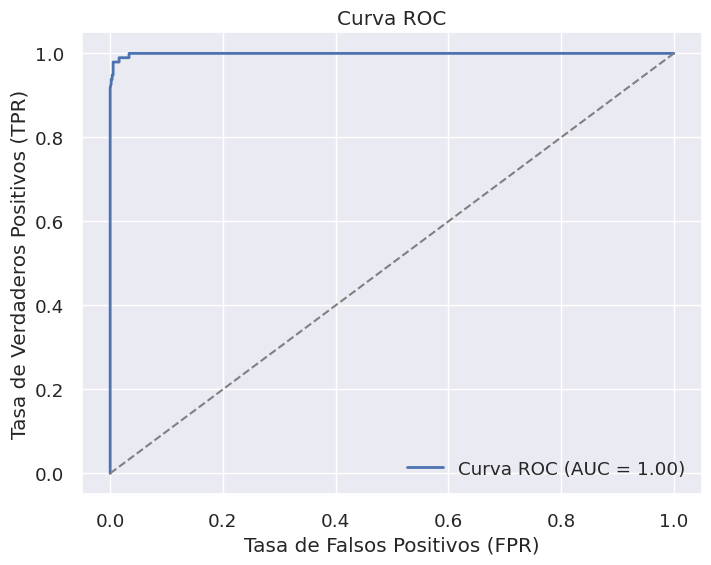

In [366]:
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades de predicción (no solo las clases predichas)
y_prob = best_model.predict_proba(x_test)[:, 1]  # Probabilidad de la clase positiva

# Calcular los valores de FPR, TPR y thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Dibujar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea aleatoria
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)

# Guardar el gráfico
#plt.savefig(path_images+'fig_28.png', format='png', dpi=300)

plt.show()

**Figura 28:** Curva ROC del modelo para dataset de Test

Observaciones:
* La línea diagonal gris representa el rendimiento de un modelo aleatorio.
* Un valor cercano a 1 indica que el modelo es bueno, mientras que un valor cercano a 0.5 indica un rendimiento similar al de un modelo aleatorio.
* Para nuestro caso se considera un modelo aceptable con un área bajo la curva (AUC) de 0.85

Graficamos para training y para test

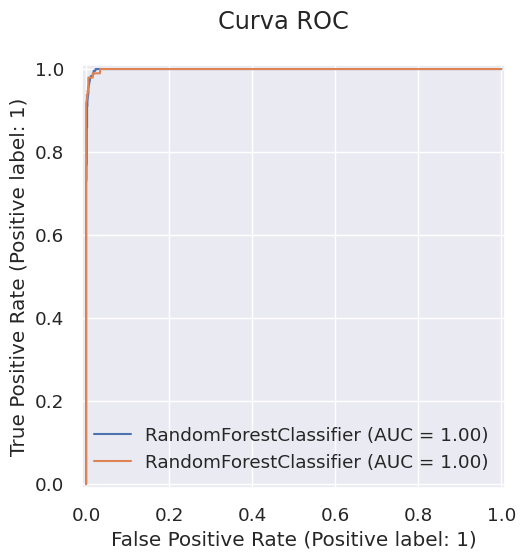

In [367]:
from sklearn.metrics import RocCurveDisplay

tr_disp = RocCurveDisplay.from_estimator(best_model, x_train, y_train)
ts_disp = RocCurveDisplay.from_estimator(best_model, x_test, y_test, ax=tr_disp.ax_) #Naranja
ts_disp.figure_.suptitle("Curva ROC")

# Guardar el gráfico
#plt.savefig(path_images+'fig_29.png', format='png', dpi=300)

plt.show()

**Figura 29:** Curva ROC del modelo para dataset de Test versus dataset Train

## 7.6) Mejorar el modelo 🌡️

Podriamos hacer un nuevo modelo unicamente con las variables que tienen mayor importancia de acuerdo al modelo previo

In [234]:
# Obtener la importancia de las características
feature_importances = pd.DataFrame({
    'feature': independent_variables,
    'importance': best_model.feature_importances_*100
})

feature_importances = feature_importances.sort_values(by='importance', ascending=False)

In [272]:
feature_importances.sort_values('importance', ascending=False).head(len(independent_variables)).style.background_gradient(cmap='coolwarm', low=1, high=0)

,feature,importance
9,Recency,11.115798
10,Customer_Days,10.429739
0,AcceptedCmpOverall,9.895368
13,Income,7.566019
3,MntTotal,6.633620
4,MntRegularProds,6.535064
6,MntWines,6.334159
7,MntMeatProducts,6.273539
16,MntGoldProds,5.709304
18,MntSweetProducts,4.419807


**Figura 30:** Mapa de calor de la importancia de cada variable en el modelo

## 7.7) Predicción vs Realidad

Veremos en que grado coinciden los resultados predecidos versus la realidad y como afectan al negocio

In [395]:
# Realizar las predicciones sobre todo el dataset
predicciones = best_model.predict(X)  # Realizamos las predicciones para todo el dataset

In [396]:
resultados = pd.DataFrame(X, columns=independent_variables)  # Usamos las variables independientes para crear el DataFrame
resultados['Response_Pred'] = predicciones  # Añadimos las predicciones al DataFrame
resultados['Response_Real'] = Y  # Añadimos las respuestas reales (etiquetas)
resultados['ID'] = ids_originales  # Añadimos los ID de los clientes

In [397]:
# Filtrar los clientes que deben ser contactados (aquellos con predicción positiva)
customers_campaign_pred = pd.DataFrame()
customers_campaign_pred = resultados[resultados['Response_Pred'] == 1]

In [398]:
# Filtrar los clientes que realmente fueron contactados
customers_campaign_real = pd.DataFrame()
customers_campaign_real = resultados[resultados['Response_Real'] == 1]

In [399]:
customers_campaign_real.shape

(333, 23)

333 Clientes aceptaron la oferta de la última campaña

In [400]:
# Verificar que la exportación haya sido correcta
#print(clientes_campaign[['ID', 'Response_Pred', 'Response_Real']].head())

In [401]:
customers_campaign_real.shape

(333, 23)

El modelo predijo 303 Clientes que aceptarían la oferta de la última campaña

¿Son los mismos clientes o hay nuevos?

In [402]:
# Obtener los conjuntos de IDs de ambos datasets
ids_real = set(customers_campaign_real['ID'])
ids_pred = set(customers_campaign_pred['ID'])

# Calcular la intersección de ambos conjuntos (IDs comunes)
common_ids = ids_real.intersection(ids_pred)

# Calcular la proporción de coincidencias
proporcion = len(common_ids) / len(ids_real)

# Mostrar el resultado
print(f"Proporción de clientes coincidentes entre las respuestas predecidas y las reales: {proporcion:.2f}")

Proporción de clientes coincidentes entre las respuestas predecidas y las reales: 0.90


In [403]:
#Comparar los clientes de todo el dataset versus solo los clientes seleccionados por el modelo
Comparing = pd.DataFrame()

# Clientes unicos
Comparing['Unique_Customers'] = [customers_campaign_real.ID.nunique(), customers_campaign_pred.ID.nunique(), 100*(customers_campaign_real.ID.nunique()-customers_campaign_pred.ID.nunique())/customers_campaign_real.ID.nunique()] # combinar los dataframes

# Productos Vendidos
Comparing['Gadgets_sold'] = [customers_campaign_real.AcceptedCmpOverall.sum(),customers_campaign_pred.AcceptedCmpOverall.sum(),100*(customers_campaign_real.AcceptedCmpOverall.sum()-customers_campaign_pred.AcceptedCmpOverall.sum())/customers_campaign_real.AcceptedCmpOverall.sum()] # combinar los dataframes

Comparing.index = ['Clientes Contactados','Clientes Selec/Modelo', 'Diferencia(%)']

In [404]:
Comparing.round(2)

,Unique_Customers,Gadgets_sold
Clientes Contactados,333.00,329.00
Clientes Selec/Modelo,303.00,326.00
Diferencia(%),9.01,0.91


Al contactar sólo a los clientes que el modelo predijo que probablemente aceptarían la oferta(que son 303 clientes), contactaríamos un 9% menos que los clientes que realmente aceptaron la oferta(respecto a 333 clientes), pero la cantidad de gadgets vendidos disminuiría solo un 0,91%.

## 7.8) ⭐ **Bonus:** Exportar lista de clientes a contactar 📃

Vamos a exportar en un CSV los clientes que deben ser contactados (aquellos con predicción positiva)

In [268]:
# Exportar los resultados a un archivo CSV o Excel
#customers_campaign_pred[['ID', 'Response_Real', 'Response_Pred']].to_csv(path_files+'clientes_para_campaña.csv', index=False)

## 7.9) Resultados 🚀

### Resultados

* Una precisión de 88,10% sugiere que el modelo tiene un buen rendimiento en términos generales.
* Un F1 Score de 95,46% indica que hay un equilibrio moderado entre la precisión y el recall, pero el modelo aún podría mejorar en cuanto a la captura de los verdaderos positivos
* Un AUC de 0.89 es excelente y sugiere que el modelo tiene una gran capacidad para diferenciar entre clientes compradores y no compradores.

# 8) Conclusiones 🙌

* Usando un enfoque basado en datos, es posible aumentar el beneficio de las campañas al seleccionar mejor a los clientes con mayor probabilidad de realizar una compra.

* Los clientes que compraron al menos una oferta en las últimas 5 campañas fueron principalmente aquellos sin niños pequeños o adolescentes en casa, con mejores ingresos, mayor cantidad de gasto y transacciones, y con más compras de productos gold y menos compras con descuento, siendo nuestros mejores clientes.

* Segmentando a los clientes según su Recencia, Frecuencia y Valor Monetario, es posible identificar a grupos de clientes a los cuáles se debe priorizar para estrategias de marketing y a otros a los que se podría necesitar estrategias de reactivación o retención.

* Se plantea un modelo predictivo con Random Forest que le permitirá a iFood contactar a menos personas, pero con una mayor probabilidad de conversión. Esto significa que iFood podrá ahorrar recursos en la campaña y se centrará en aquellos clientes con más probabilidades de comprar.

### Impacto en el Negocio 💰

* Al centrarnos únicamente en nuestros mejores clientes, aumentaríamos el ROI de la campaña del -45% al -7,89%. Aún no es la situación ideal, pero ya representa una mejora.

* Con un F1 score de 46,25% y un AUC de 0.87, el modelo ha demostrado ser muy efectivo para predecir a los compradores potenciales, lo que significa que la campaña de marketing será mucho más eficiente.

* La tasa de éxito de la campaña aumentará al enfocarse en los clientes más propensos a comprar, gracias a que el modelo está identificando correctamente a un 91% de los compradores (True Positives), lo que permitirá reducir costos y aumentar las ganancias al contactar solo a los clientes correctos.

* Al contactar sólo a los clientes que el modelo predijo que probablemente aceptarían la oferta (son 303 clientes), contactaríamos un 9% menos que los clientes que realmente aceptaron la oferta (respecto a 333 clientes), pero la cantidad de gadgets vendidos disminuiría solo un 0,91%. Además,se obtuvo una proporción de clientes coincidentes del 90% entre las respuesta predecidas y las reales.


* El modelo permite contactar a menos personas pero con una mayor probabilidad de conversión. Esto significa que iFood podrá ahorrar recursos en la campaña, ya que se centrará en aquellos clientes con más probabilidades de comprar

* Al reducir la cantidad de clientes no interesados que son contactados, se evita generar frustración o incomodidad en los clientes al recibir ofertas no relevantes.